# __PARKING SPOT PREDICTOR__
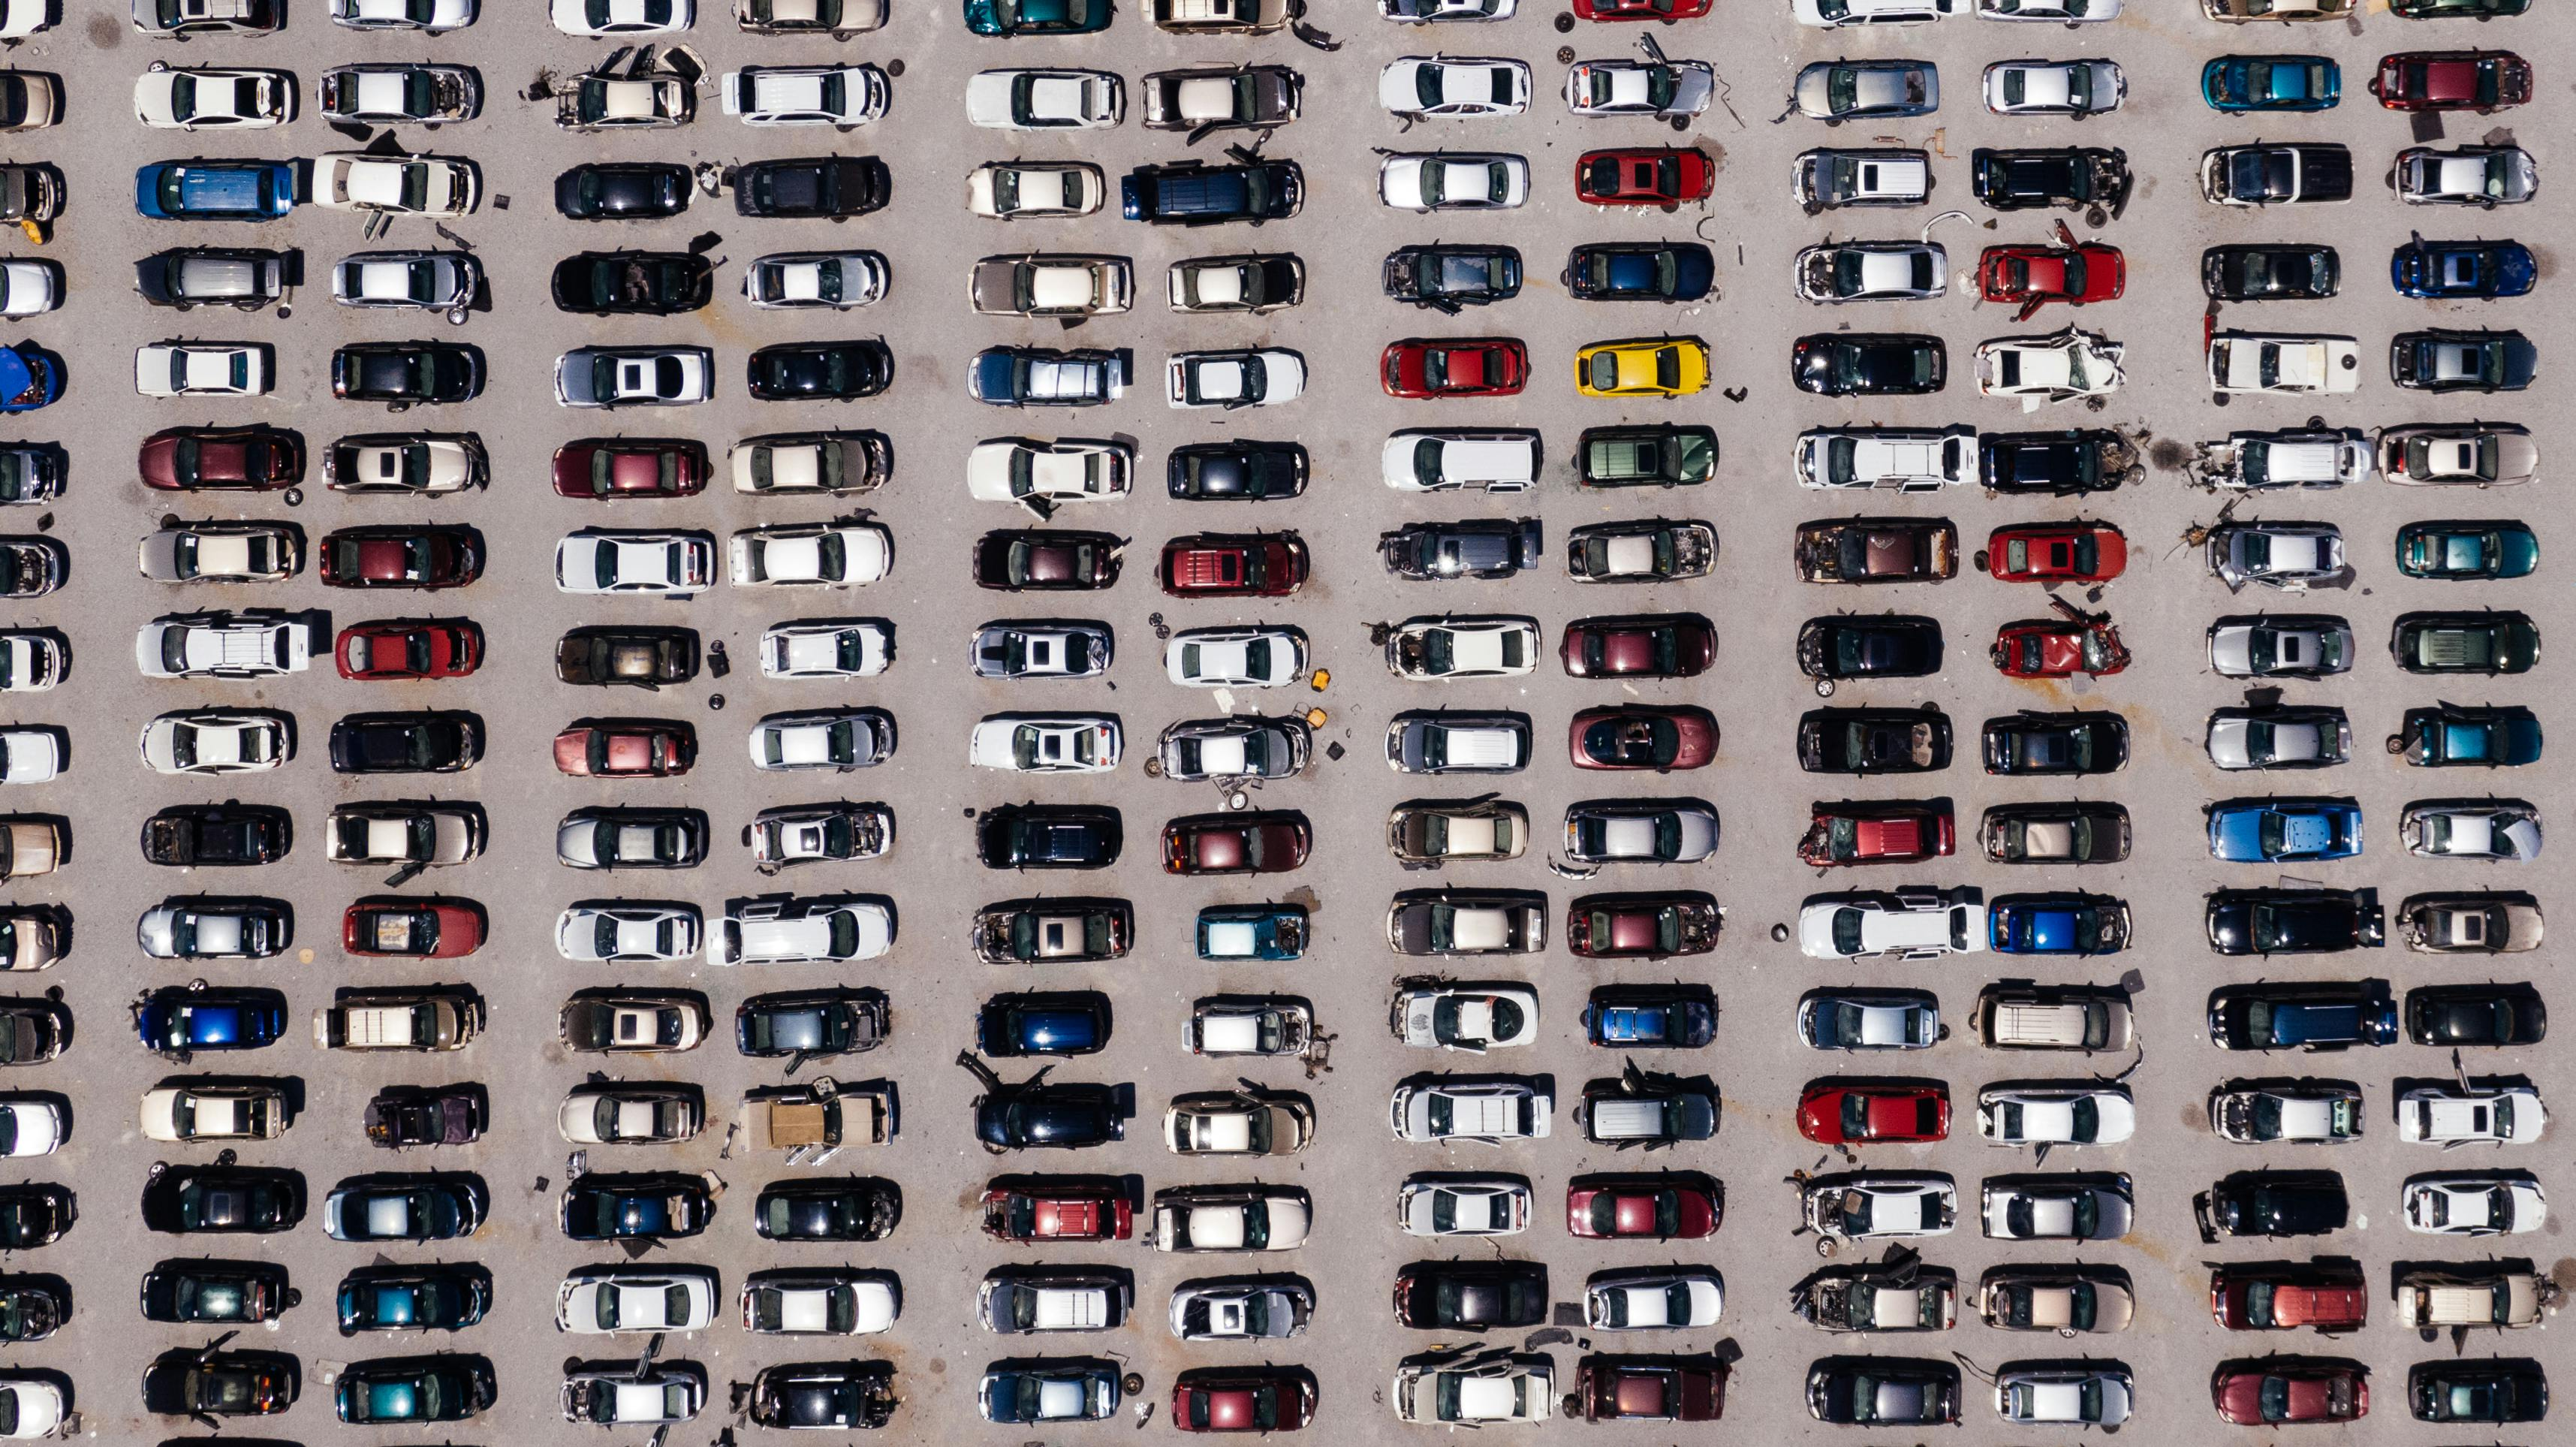

***
This is a collaborative group project done during Phase 5 of Moringa School's Data Science program. The team members of this group include:
1. [Ezra Kipchirchir](https://github.com/dev-ezzy)
2. [Grace Mutuku](https://github.com/GraceKoki)
3. [Joy Ogutu](https://github.com/Ogutu01)
4. [Mary Gaceri](https://github.com/MaryGaceri)
5. [Mwiti Mwongo](https://github.com/M13Mwongo)

***

## __INTRODUCTION__
Using data analytics and machine learning techniques, we explore the field of **parking prediction** and **urban mobility**. Our research develops a state-of-the-art algorithm that can effectively estimate parking spot availability in metropolitan locations by utilizing real-time parking occupancy data from several sources inclusive of historical records. We welcome you to journey with us as we explore the inner workings of our prediction model, emphasize significant discoveries, and demonstrate how it may revolutionize urban parking system optimization.

### __Table of contents__

- [Business Understanding](#PROJECT-OVERVIEW)
- [Data Sourcing](#DATA-SOURCING)
- [Data Understanding](#DATA-UNDERSTANDING)
- [Data Preprocessing](#DATA-PREPROCESSING)
- [Exploratory Data Analysis](#EXPLORATORY-DATA-ANALYSIS)
- [Time Series Modelling](#TIME-SERIES-MODELLING)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)

### __PROJECT OVERVIEW__
### __Business Understanding__
Finding a parking place in the busy urban environments of major cities throughout the world is a problem that worries locals, commuters, and tourists equally. The need for effective parking solutions is greater than ever due to the fast urbanization, rising traffic, and expanding population. Our initiative is to change parking management in metropolitan areas confronting comparable difficulties throughout the globe by utilizing data-driven insights in response to this urgent issue. It is impossible to exaggerate the significance of this endeavor for metropolitan areas. Urban centers are the epicenters of activity, drawing millions of people for business, pleasure, and employment because they are social, cultural, and economic magnets. Nonetheless, these cities' disorganized traffic and inadequate parking facilities provide serious difficulties for local government, companies, and citizens. Our initiative intends to improve urban mobility by reducing travel times, relieving traffic congestion, and offering accurate estimates of parking spot availability.

One of the key challenges lies in accessing reliable data on parking occupancy and usage patterns. Parking spaces in urban areas are often managed by various entities, including public agencies, private operators, and informal attendants, making data collection a complex and fragmented process. Moreover, concerns about data privacy and security have hindered efforts to gather comprehensive parking data, as authorities are cautious about disclosing sensitive information due to security reasons.

Despite these challenges, our project aims to collaborate with relevant stakeholders, including:

- **City authorities**: Vital for regulatory support, infrastructure planning, and policy implementation to enhance urban mobility and parking management.
- **Parking operators**: Key players responsible for managing parking facilities, providing valuable data, and implementing innovative solutions to optimize parking spot utilization.
- **Technology partners**: Essential for developing and implementing data-driven tools, such as predictive models and smart parking systems, to improve parking availability and streamline operations.
- **Motorists (end-users)**: The primary beneficiaries of improved parking management solutions, as they will benefit from reduced search time, enhanced convenience, and better access to parking spots.

By fostering partnerships and promoting transparency, we seek to establish a data-sharing framework that respects privacy concerns while enabling the development of innovative solutions to improve parking management in urban centers worldwide. Optimizing parking and reducing congestion, enhances business efficiency, attracts investments, and stimulates economic activity. Encouraging alternative transportation modes reduces emissions and contributes to environmental conservation. Through data analytics, stakeholder collaboration, and innovative tech, we aim to create smarter, more efficient urban mobility ecosystems benefiting all.

### __Problem Statement__
The absence of accurate and up-to-date data on parking spot availability not only impedes the development of effective predictive models but also limits the implementation of innovative solutions aimed at addressing urban mobility challenges. Without access to comprehensive data sources, parking prediction systems struggle to provide reliable real-time information, leading to suboptimal parking decisions and increased traffic congestion. Overcoming these challenges is crucial for creating a parking prediction system that not only improves parking navigation but also contributes to the overall sustainability and livability of urban areas by enhancing economic productivity, and fostering a more seamless urban mobility experience for all stakeholders.

## __Objectives__
**Main Objective:**
To develop a robust time series-based parking spot predictor that accurately forecasts parking spot availability in urban areas, leveraging historical parking data and real-time variables.

**Other Objectives:**
1. To collect and preprocess historical parking data from various sources and integrate relevant time-varying features, such as time of day, day of the week and holidays into the predictive model.

2. To explore various time series forecasting techniques, including ARIMA and SARIMA and evaluate the performance of each technique using metrics like accuracy, precision, recall, and F1-score. 

3. To develop and deploy a user-friendly interface or mobile application that allows motorists to access real-time parking predictions and navigate to available parking spots efficiently.


# __DATA SOURCING__

# __DATA UNDERSTANDING__
## __a) Process of fetching data__
Our data was sourced from the Transport for New South Wales(TfNSW) website, more speficially, from their [Car Park API](https://opendata.transport.nsw.gov.au/dataset/car-park-api).

The API - whose base URL was `https://api.transport.nsw.gov.au/v1/carpark` - had two endpoints:
1. `{baseURL}?facility={facility_id}` - Containts one optional variable ***facility_id***. Returns occupancy details of a car park based on a facility ID. If the facility ID is specified, a list of facility names with their ID will be returned.
2. `{baseURL}}/history?facility={facility_id}&eventdate={date_in_question}` - Contains two mandatory variables, ***facility_id*** and ***date_in_question*** formatted as *YYYY-MM-DD*. Returns historical occupancy details of a car park based on a facility ID
and event date. 

The team initially planned to utilize an API to retrieve historical parking data spanning six months. This extended timeframe would provide comprehensive insights into parking behaviors under various circumstances, including holidays and other relevant factors. We developed a code to automate API requests and store the retrieved information in a DataFrame. However, upon closer examination of the API's structure and the received data, it was decided to make these requests once and store the resulting data in JSON files, which can be easily read using pandas.

Below is the function used to fetch car park data from the TfNSW API and save it to a JSON file. Subsequently, the JSON file is read into a DataFrame, with columns renamed as necessary since the API provides data without column names.

```py
def get_carparks_list():
  dotenv.load_dotenv('.env')
  # path to json file created/saved
  carparks_file_path = './data/carparks_original.json'
  # Delete any existing file at carparks path
  os.remove(carparks_file_path) if os.path.exists(carparks_file_path) else None

  # Creating header for request
  headers = {
      "Authorization": f"apikey {os.environ.get('apikey')}"
  }
  # Specifying url to get carparks
  url_carparks = 'https://api.transport.nsw.gov.au/v1/carpark'

  list_of_carparks = requests.get(url_carparks, headers=headers).json()

  df_carparks = pd.DataFrame.from_dict(list_of_carparks, orient='index')
  # Resetting the index to label the columns afterwards
  df_carparks = df_carparks.reset_index()
  df_carparks.columns = ['facility_id', 'CarParkName']

  # Deleting old file
  os.remove(carparks_file_path) if os.path.exists(carparks_file_path) else None

  # Creating new file with updated column titles
  pd.DataFrame.to_json(df_carparks, carparks_file_path)
print('File created and updated successfully.')
  return
```

Although a comprehensive list of all car parks was available, not all of them would be utilized due to incomplete or inaccurate information for certain columns, as indicated by the API. Consequently, records for these car parks with facility IDs ranging between `486` and `490` (inclusive) were deemed unnecessary and were removed from the `carparks_original.json` file. The following function was employed to perform this removal.

```python
# Dropping rows 28,29,30,31,32
df_carpark_details.drop(index=[28,29,30,31,32],inplace=True)

# Resetting the index
df_carpark_details.reset_index(drop=True,inplace=True)

# Sorting by facility_id
df_carpark_details.sort_values(by='facility_id',inplace=True)
df_carpark_details
```

Upon obtaining the names of various facilities, the team delved into the structure of each car park. It was observed that each car park could have a unique configuration, with each facility potentially comprising one or more car parks, and each car park potentially containing one or more zones, as illustrated below.
<div style="text-align:center">
<img src='./images/carpark_structure.png' alt='Carpark structure'>
</div>

With this understanding, the team developed the following function to retrieve the individual details of the car parks, utilizing the previously created JSON file. This process enabled a thorough examination of their structure, which was then saved in a separate JSON file named `carpark_structure.json` for future reference.
```py
def get_carpark_structure(path_to_carpark_json_file):
  # Delete file found at same path
  os.remove('./data/carpark_structure.json') if os.path.exists('./data/carpark_structure.json') else None
  # Add file to dataframe
  df_carparks = pd.read_json(path_to_carpark_json_file)
  # Initialise array that will hold information
  carpark_details_array = []

  # Loop through carparks to get information
  for index, row in df_carparks.iterrows():
    facility = row['facility_id']
    url = f'https://api.transport.nsw.gov.au/v1/carpark?facility={facility}'

    # Creating header for request
    headers = {
        "Authorization": f"apikey {os.environ.get('apikey')}"
    }
    # Make request
    response = requests.get(url, headers=headers).json()

    # Add to array
    carpark_details_array.append(response)

  # Store information in JSON file
  with open('./data/carpark_structure.json', 'w') as f:
    json.dump(carpark_details_array, f)
  # Create dataframe and return it
  return pd.DataFrame(carpark_details_array)
```

Following this, a new function called `date_getter` was developed to generate a list containing all the days within a specified time period. This function proves essential as it provides the necessary dates for retrieving car park history within a given time delta.

```py
def date_getter(td):
    """
    Generate a list of dates based on the input time delta.

    Args:
    td (timedelta): The time delta to subtract from the cutoff date.

    Returns:
    list: A list of dates in the format "YYYY-MM-DD".
    """
    # Array that stores the dates to be searched for
    date_period_list = []

    # The last date to be searched for
    cutoff_date = datetime(2023, 12, 31)
    target_date = cutoff_date - td

    # Ensure that records of each day are obtained
    delta = timedelta(days=1)

    while target_date <= cutoff_date:
        date_period_list.append(target_date.strftime("%Y-%m-%d"))
        target_date += delta

    return date_period_list
```

Having a date function, a new function (`get_carpark_history`) was made to fetch the carpark history of a particular facility across a range of dates.

```python
def get_carpark_history(facility, dates_array):
    """
    Get carpark history data for a specific facility and dates.

    Args:
    facility (str): The name of the carpark facility.
    dates_array (list): List of dates for which to retrieve carpark history data.

    Returns:
    pandas.DataFrame: DataFrame containing the carpark history data.
    """
    # Initialize data array
    data_array = []

    # Define the path for the JSON file
    json_file_path = f"./data/carpark history/facility_{facility}.json"

    # Set the request header
    headers = {
        "Authorization": f"apikey {os.environ.get('apikey')}"
    }

    # Delete the file if it exists
    if os.path.exists(json_file_path):
        os.remove(json_file_path)

    # Make a request for each date and aggregate the data
    for date in dates_array:
        url = f'https://api.transport.nsw.gov.au/v1/carpark/history?facility={facility}&eventdate={date}'
        response = requests.get(url, headers=headers).json()

        if data_array == []:
            data_array = response
        else:
            data_array = data_array + response

    # Save the data to a JSON file
    with open(json_file_path, 'w') as f:
        json.dump(data_array, f)

    # Read the JSON file
    with open(json_file_path) as f:
        data = json.load(f)

    # Convert the read data into a pandas DataFrame
    return pd.DataFrame(data)
```



## __DATA LOADING__

In [1]:
import requests
import json
import pandas as pd
import numpy as np
# import dotenv
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix, classification_report, precision_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from datetime import datetime,timedelta

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [2]:
carparks_df = pd.read_parquet('data/carpark_history_6_months_zones_coords.parquet')
carparks_df.head()

,tsn,time,spots_x,zones,ParkID,occupancy,MessageDate,facility_id,facility_name,tfnsw_facility_id,...,spots_y,zone_id,zone_name,occupancy.loop,occupancy.monthlies,occupancy.open_gate,occupancy.total,occupancy.transients,longitude,latitude
0,207210,741448862,213,"[{'occupancy': {'loop': None, 'monthlies': Non...",1,"{'loop': None, 'monthlies': None, 'open_gate':...",2023-07-01T00:01:02,6,Gordon Henry St North Car Park,207210TPR001,...,213,1,Gordon Henry St North Car Park,None,None,None,31,None,-33.756009,151.154528
1,207210,741450092,213,"[{'occupancy': {'loop': None, 'monthlies': Non...",1,"{'loop': None, 'monthlies': None, 'open_gate':...",2023-07-01T00:21:32,6,Gordon Henry St North Car Park,207210TPR001,...,213,1,Gordon Henry St North Car Park,None,None,None,30,None,-33.756009,151.154528
2,207210,741468991,213,"[{'occupancy': {'loop': None, 'monthlies': Non...",1,"{'loop': None, 'monthlies': None, 'open_gate':...",2023-07-01T05:36:31,6,Gordon Henry St North Car Park,207210TPR001,...,213,1,Gordon Henry St North Car Park,None,None,None,31,None,-33.756009,151.154528
3,207210,741469862,213,"[{'occupancy': {'loop': None, 'monthlies': Non...",1,"{'loop': None, 'monthlies': None, 'open_gate':...",2023-07-01T05:51:02,6,Gordon Henry St North Car Park,207210TPR001,...,213,1,Gordon Henry St North Car Park,None,None,None,32,None,-33.756009,151.154528
4,207210,741474196,213,"[{'occupancy': {'loop': None, 'monthlies': Non...",1,"{'loop': None, 'monthlies': None, 'open_gate':...",2023-07-01T07:03:16,6,Gordon Henry St North Car Park,207210TPR001,...,213,1,Gordon Henry St North Car Park,None,None,None,33,None,-33.756009,151.154528


In [3]:
carparks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924545 entries, 0 to 2924544
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   tsn                   int32  
 1   time                  int32  
 2   spots_x               int32  
 3   zones                 object 
 4   ParkID                int32  
 5   occupancy             object 
 6   MessageDate           object 
 7   facility_id           int32  
 8   facility_name         object 
 9   tfnsw_facility_id     object 
 10  parent_zone_id        object 
 11  spots_y               int32  
 12  zone_id               int32  
 13  zone_name             object 
 14  occupancy.loop        object 
 15  occupancy.monthlies   object 
 16  occupancy.open_gate   object 
 17  occupancy.total       int32  
 18  occupancy.transients  object 
 19  longitude             float64
 20  latitude              float64
dtypes: float64(2), int32(8), object(11)
memory usage: 379.3+ MB


In [4]:
df1 = carparks_df[['facility_id','facility_name','spots_x',  'occupancy.total',
                   'MessageDate','longitude','latitude' ]]

# Renaming the spots column to something more intuitive
df1.rename(columns={'spots_x': 'capacity'}, inplace=True)
df1.rename(columns={'occupancy.total': 'occupancy'}, inplace=True)


df1.head()

,facility_id,facility_name,capacity,occupancy,MessageDate,longitude,latitude
0,6,Gordon Henry St North Car Park,213,31,2023-07-01T00:01:02,-33.756009,151.154528
1,6,Gordon Henry St North Car Park,213,30,2023-07-01T00:21:32,-33.756009,151.154528
2,6,Gordon Henry St North Car Park,213,31,2023-07-01T05:36:31,-33.756009,151.154528
3,6,Gordon Henry St North Car Park,213,32,2023-07-01T05:51:02,-33.756009,151.154528
4,6,Gordon Henry St North Car Park,213,33,2023-07-01T07:03:16,-33.756009,151.154528


## __DATA PREPROCESSING__

## __FEATURE ENGINEERING__

In [5]:
df1['parking_availability'] = df1['capacity'] - df1['occupancy']
df1.head()

,facility_id,facility_name,capacity,occupancy,MessageDate,longitude,latitude,parking_availability
0,6,Gordon Henry St North Car Park,213,31,2023-07-01T00:01:02,-33.756009,151.154528,182
1,6,Gordon Henry St North Car Park,213,30,2023-07-01T00:21:32,-33.756009,151.154528,183
2,6,Gordon Henry St North Car Park,213,31,2023-07-01T05:36:31,-33.756009,151.154528,182
3,6,Gordon Henry St North Car Park,213,32,2023-07-01T05:51:02,-33.756009,151.154528,181
4,6,Gordon Henry St North Car Park,213,33,2023-07-01T07:03:16,-33.756009,151.154528,180


In [6]:
# Split the datetime string into date and time components
df1[['date', 'time']] = df1['MessageDate'].str.split('T', expand=True)


# Define time categories
def categorize_time(hour):
    if 4 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 18:
        return 'Late Afternoon'
    elif 18 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'
    
# Indicate the day of the week according to the date
df1['day_of_week'] = pd.to_datetime(df1['date']).dt.day_name()

# Convert the 'time' column to timedelta object
df1['time'] = pd.to_datetime(df1['time'])

# Extract the hour component
df1['hour'] = pd.to_datetime(df1['time']).dt.hour

# Create a new column 'time_category'
df1['time_category'] = df1['hour'].apply(categorize_time)

# Convert 'date' column to datetime object
df1['date'] = pd.to_datetime(df1['date'])

# Extract month name from the 'date' column and assign it to a new 'month' column
df1['month'] = df1['date'].dt.strftime('%B')

# Convert 'time' column to time object
df1['time'] = pd.to_datetime(df1['time']).dt.time

# Drop unnecessary columns
df1.drop(['hour', 'MessageDate'], axis=1, inplace=True)

# Display the DataFrame with the new columns
df1.head()

,facility_id,facility_name,capacity,occupancy,longitude,latitude,parking_availability,date,time,day_of_week,time_category,month
0,6,Gordon Henry St North Car Park,213,31,-33.756009,151.154528,182,2023-07-01,00:01:02,Saturday,Night,July
1,6,Gordon Henry St North Car Park,213,30,-33.756009,151.154528,183,2023-07-01,00:21:32,Saturday,Night,July
2,6,Gordon Henry St North Car Park,213,31,-33.756009,151.154528,182,2023-07-01,05:36:31,Saturday,Early Morning,July
3,6,Gordon Henry St North Car Park,213,32,-33.756009,151.154528,181,2023-07-01,05:51:02,Saturday,Early Morning,July
4,6,Gordon Henry St North Car Park,213,33,-33.756009,151.154528,180,2023-07-01,07:03:16,Saturday,Morning,July


In [7]:
final_df = df1.copy()
# Read holiday information DataFrame
holiday_data = pd.read_csv('data/NSW_holidays_2023.csv')

# Convert 'date' column to datetime format
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format='%b %d')

# Extract month and day information and format it as 'Month Day' in holiday_data
holiday_data['month_day'] = holiday_data['date'].dt.strftime('%m-%d')

# Create a set of holiday month-day combinations
holidays_month_day = set(holiday_data['month_day'])

# Check if the month-day combination of each date in df1 matches any holiday month-day combination
final_df['month_day'] = final_df['date'].dt.strftime('%m-%d')
final_df['is_holiday'] = final_df['month_day'].isin(holidays_month_day)

# Map True/False to 'yes'/'no' for 'is_holiday' column
final_df['is_holiday'] = final_df['is_holiday'].map({True: 'Yes', False: 'No'})

# Drop the temporary 'month_day' column
final_df.drop(columns=['month_day'], inplace=True)

# Display the DataFrame to verify changes
final_df.head()

,facility_id,facility_name,capacity,occupancy,longitude,latitude,parking_availability,date,time,day_of_week,time_category,month,is_holiday
0,6,Gordon Henry St North Car Park,213,31,-33.756009,151.154528,182,2023-07-01,00:01:02,Saturday,Night,July,No
1,6,Gordon Henry St North Car Park,213,30,-33.756009,151.154528,183,2023-07-01,00:21:32,Saturday,Night,July,No
2,6,Gordon Henry St North Car Park,213,31,-33.756009,151.154528,182,2023-07-01,05:36:31,Saturday,Early Morning,July,No
3,6,Gordon Henry St North Car Park,213,32,-33.756009,151.154528,181,2023-07-01,05:51:02,Saturday,Early Morning,July,No
4,6,Gordon Henry St North Car Park,213,33,-33.756009,151.154528,180,2023-07-01,07:03:16,Saturday,Morning,July,No


## __EXPLORATORY DATA ANALYSIS__
In this section, through a combination of visualizations, statistical summaries, and data manipulation techniques, we delve into the dataset's intricacies, examining the distribution of variables, identifying correlations, and detecting anomalies. By thoroughly exploring the data's structure and characteristics, we aim to gain a deeper understanding of its underlying properties, paving the way for informed hypotheses and refined analysis strategies.

### __Univariate Data Analysis__

The distribution of the numerical columns is visualized below using distribution plots (histogram with KDE) and boxplots.

In [8]:
final_df.columns

Index(['facility_id', 'facility_name', 'capacity', 'occupancy', 'longitude',
       'latitude', 'parking_availability', 'date', 'time', 'day_of_week',
       'time_category', 'month', 'is_holiday'],
      dtype='object')

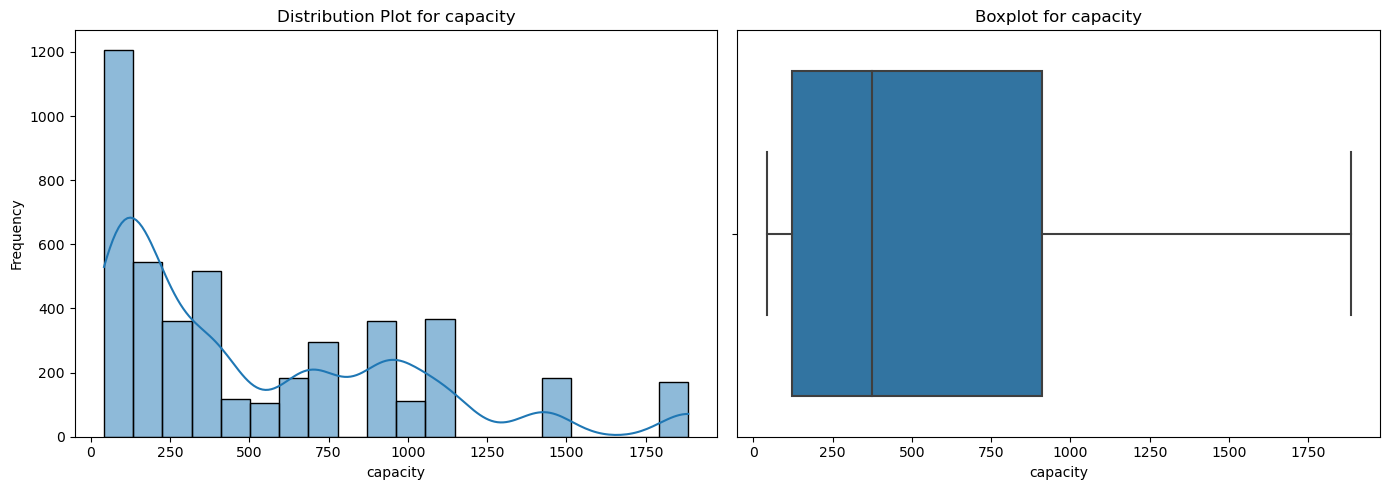

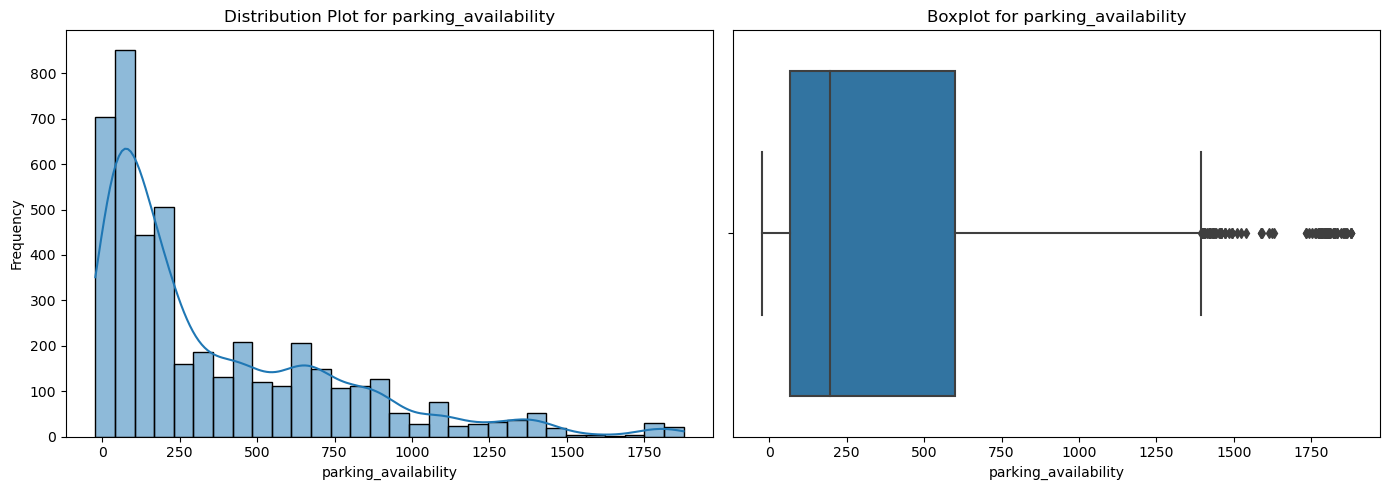

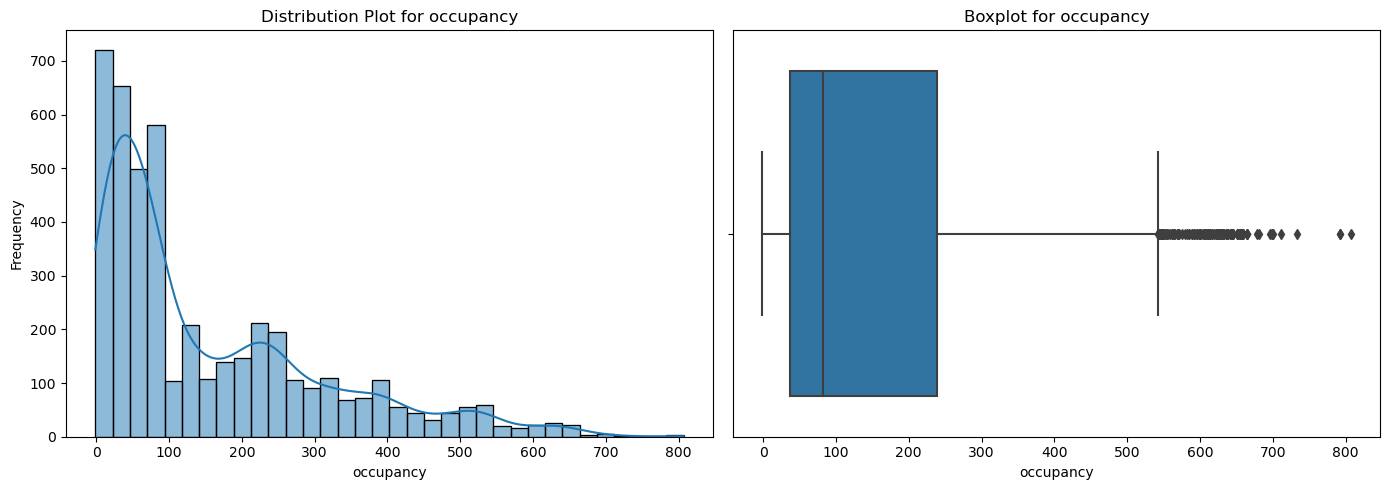

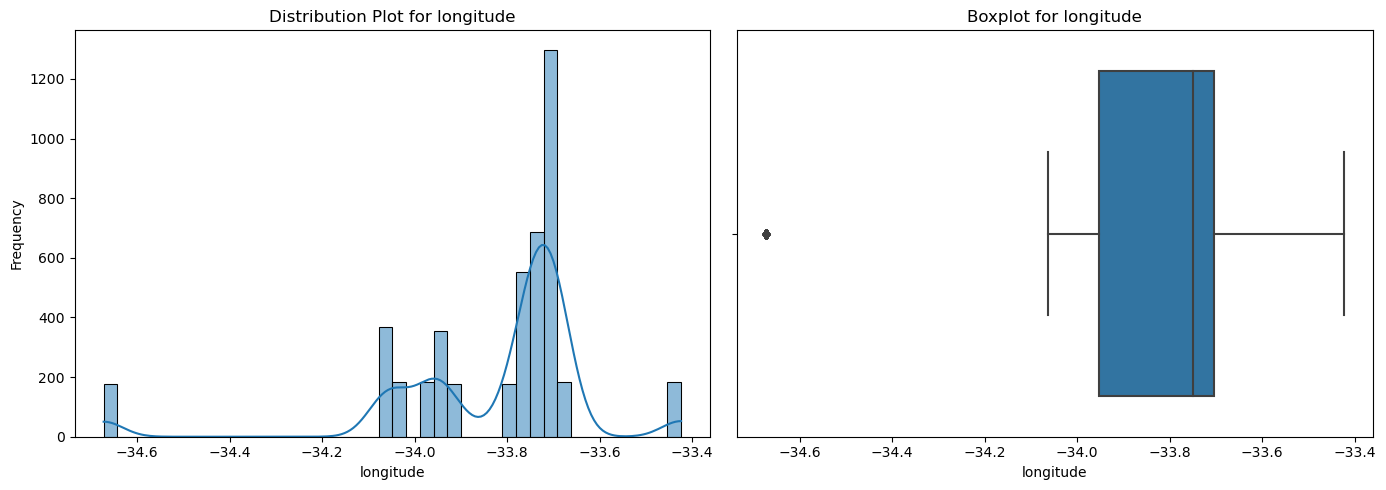

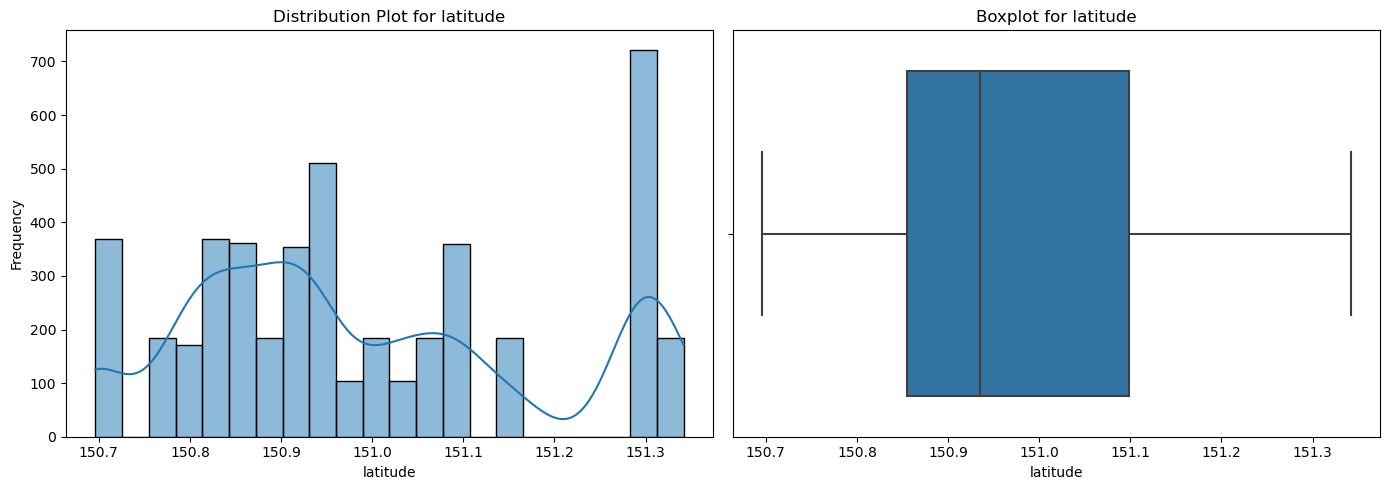

In [9]:
def preprocess_dataframe(dataframe):
    # Group by 'date' and 'facility_name', and calculate the mean for 'parking_availability' and 'occupancy'
    processed_df = dataframe.groupby(['date', 'facility_name']).agg({'parking_availability': 'mean', 'occupancy': 'mean', 'capacity': 'mean', 'longitude' : 'mean', 'latitude' : 'mean'}).reset_index()

    return processed_df

def create_distribution_plots(dataframe):
    # List of columns to include in distribution plots
    columns = ['capacity', 'parking_availability', 'occupancy', 'longitude', 'latitude']

    # Preprocess the dataframe to calculate means for 'parking_availability' and 'occupancy'
    processed_df = preprocess_dataframe(dataframe)

    # Loop through each column in the DataFrame
    for column in columns:
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(processed_df[column]):
            # Create a figure with subplots
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

            # Histogram with KDE
            sns.histplot(processed_df[column], kde=True, ax=axes[0])
            axes[0].set_title(f'Distribution Plot for {column}')
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Frequency')

            # Boxplot
            sns.boxplot(x=processed_df[column], ax=axes[1])
            axes[1].set_title(f'Boxplot for {column}')
            axes[1].set_xlabel(column)
            axes[1].set_ylabel('')

            plt.tight_layout()
            plt.show()

# Call the function to create distribution plots
create_distribution_plots(final_df)


**Capacity**

1. **Distribution Plot for Capacity**:
   - This graph illustrates the frequency distribution of capacity. On the x-axis, we have capacity values, and on the y-axis, we see the frequency. The vertical bars represent the number of occurrences (frequency) for each capacity value or range. Additionally, a smooth line overlays the bars to show the distribution trend. Notably, most data points cluster around the 0-250 capacity range, indicating higher frequency in that interval.

2. **Boxplot for Capacity**:
   - The box represents the interquartile range where 50% of the data exists. Lines extending from either end of the box (whiskers) indicate variability beyond this range, and any points beyond these whiskers are considered to be outliers.

The majority of parking facilities have a capacity clustered around the 0-250 range, with few outliers indicating larger parking capacities. The boxplot suggests that most facilities have a relatively consistent capacity, with some variability observed.

**Parking Availability**


1. **Distribution Plot for parking availability**:
   - This graph illustrates the frequency distribution of parking availability. On the x-axis, we have different ranges of parking availability (from 0 to 1750), and on the y-axis, we see the frequency of occurrence. The blue bars represent the number of occurrences (frequency) for each parking availability value or range.
   - Notably, there's a significant peak at **zero parking availability**, indicating that this value occurs most frequently. As parking availability increases, the frequency decreases.
   - A smooth line overlaid on top of the bars indicates the frequency trend more smoothly.

2. **Boxplot for parking availability**:
   - The interquartile range (IQR) is approximately between **0 and 500** for parking availability.
   - Several **outliers** are present beyond the whiskers of the boxplot.

The distribution plot indicates a significant peak at zero parking availability, suggesting that many parking facilities frequently reach full capacity. As availability increases, the frequency of occurrence decreases. The boxplot shows that the interquartile range (IQR) for parking availability is relatively small, indicating less variability in this metric compared to capacity.


**Occupancy**


1. **Distribution Plot for occupancy**:
   - This graph illustrates the frequency distribution of occupancy. On the x-axis, we have different levels of occupancy (ranging from 0 to 800), and on the y-axis, we see the frequency of occurrence. The blue bars represent the number of occurrences (frequency) for each level of occupancy.
   - Notably, there's a significant peak at **low levels of occupancy**, indicating that these values occur most frequently. As occupancy increases, the frequency decreases.
   - A smooth line overlaid on top of the bars indicates the distribution trend more smoothly.

2. **Boxplot for occupancy**:
   - The interquartile range (IQR) is large at lower occupancies, suggesting variability in the data.
   - Several **outliers** are visible at higher occupancies above 500.

Similar to parking availability, there's a peak at low levels of occupancy, indicating frequent instances of low usage. As occupancy increases, the frequency decreases. The boxplot highlights variability in occupancy levels, with some facilities experiencing higher occupancy rates and potential outliers.

**Longitude**


1. **Distribution Plot for longitude**:
   - This graph illustrates the frequency distribution of longitude data. On the x-axis, we have different longitude values, ranging from approximately **-34.6** to **-33.4**. The y-axis represents the **frequency**, with values ranging up to **1200**.
   - Notably, there's a prominent peak around **-33.8**, indicating that this longitude value occurs most frequently.
   - A smooth line overlays the bars, indicating the distribution trend.

2. **Boxplot for longitude**:
   - The interquartile range (IQR) is represented by the blue box, which spans from approximately **-34.6** to **-33.4**.
   - Lines (whiskers) extend from the box, indicating variability beyond the upper and lower quartiles. Some individual points beyond the whiskers may be potential **outliers**.

**Latitude**


1. **Distribution Plot for Latitude**:
    - On the left side, there's a distribution plot showing the frequency of data points at different latitudes.
    - The x-axis represents "latitude" with values ranging from 150.7 to 151.3.
    - The y-axis represents "Frequency" with values ranging from 0 to 700.
    - Notably, there are peaks in frequency around latitudes 150.8 and 151.2.

2. **Boxplot for Latitude**:
    - On the right side, there's a boxplot illustrating the spread of the latitude data.
    - The x-axis labels are similar to those in the distribution plot.

The distribution plots show the frequency of data points at different longitude and latitude values. While there are peaks indicating common longitude and latitude values, the boxplots reveal variability in these geographic coordinates, with potential outliers suggesting locations that deviate from the norm.


## __Count Plot of Non-Holidays and Holidays from July to December__

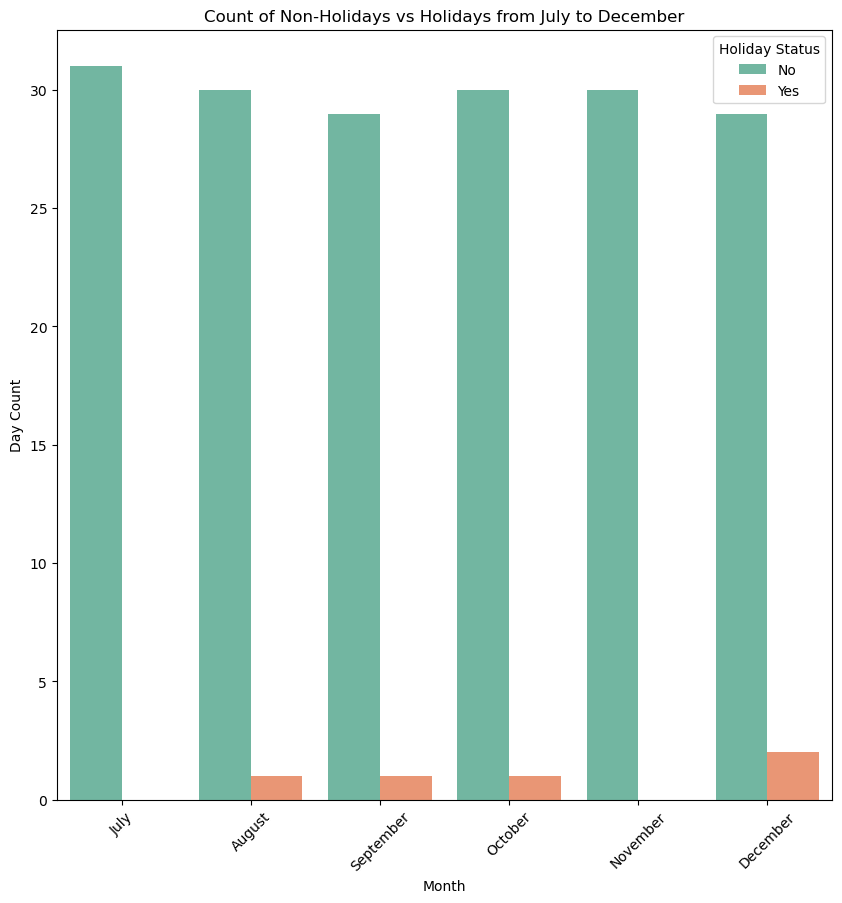

In [10]:
# Define the order of months from July to December
month_order = ['July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with specified order
final_df['month'] = pd.Categorical(final_df['month'], categories=month_order, ordered=True)

# Group by 'Month' and 'is_holiday' columns and count the occurrences
holiday_counts = final_df.groupby(['month', 'is_holiday'])['date'].nunique().reset_index(name='Count')

# Create a countplot
plt.figure(figsize=(10, 10))
sns.barplot(x='month', y='Count', hue='is_holiday', data=holiday_counts, palette='Set2')
plt.title('Count of Non-Holidays vs Holidays from July to December')
plt.xlabel('Month')
plt.ylabel('Day Count')
plt.xticks(rotation=45)
plt.legend(title='Holiday Status')
plt.show()

The graph titled "Count of Non-Holidays vs Holidays from July to December" provides a clear visualization of the distribution of non-holidays and holidays across the months from July to December. Here's a detailed summary based on the graph:

- **July to December Distribution**: The graph spans from July to December along the x-axis, representing these six months. Each month is divided into two sections: one for non-holidays (green bars) and the other for holidays (orange bars).

- **Non-Holiday Counts**: The green bars, representing non-holidays, consistently reach nearly 30 days for each month. This indicates that there are almost 30 non-holidays in each month, reflecting a regular pattern of workdays or non-holiday periods.

- **Holiday Counts**: In contrast, the orange bars, representing holidays, appear at the bottom of each month and are significantly shorter compared to the green bars. This indicates that the number of holidays is relatively lower compared to non-holidays. 

- **Legend Explanation**: The legend in the top-right corner provides clarity on the color representation:
  - The green color corresponds to "No" holiday status.
  - The orange color corresponds to "Yes" holiday status.

The distribution of holiday days across the months shows variation, with some months having fewer holidays than others. It highlights the prevalence of non-holiday days compared to holidays and allows for easy comparison across the months.

## __Bivariate Analysis__

### __Total Capacity of Parking spots for each Facility__

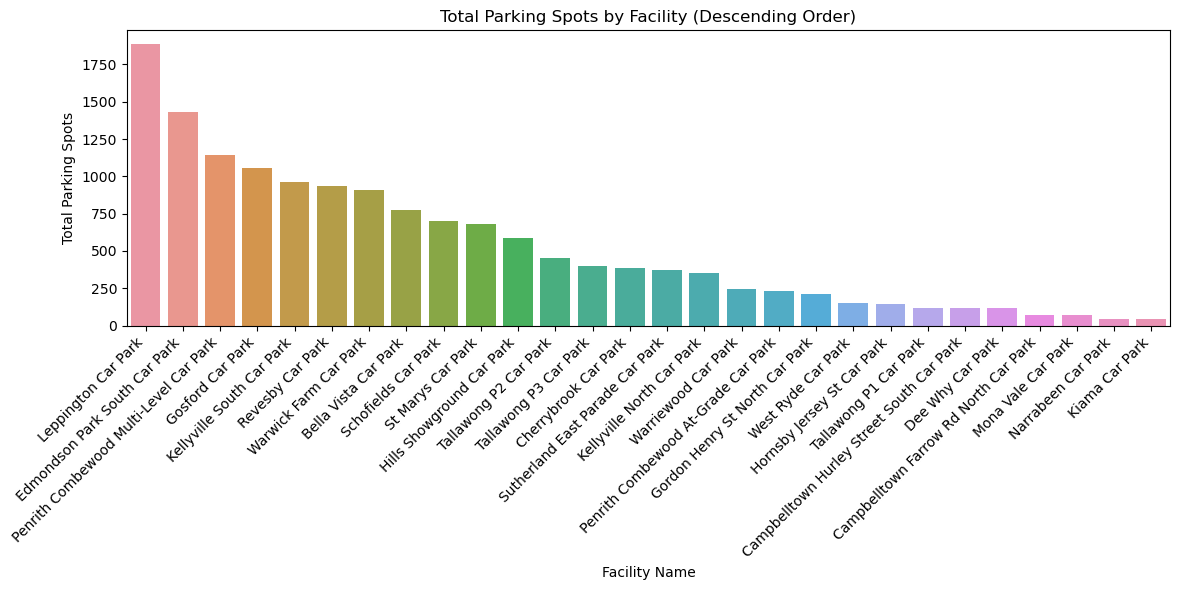

In [11]:
# Group by facility name and sum the total parking spots
facility_parking_spots = final_df.groupby('facility_name')['capacity'].first().reset_index()

# Sort the DataFrame by total parking spots in descending order
facility_parking_spots = facility_parking_spots.sort_values(by='capacity', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='facility_name', y='capacity', data=facility_parking_spots)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Facility Name')
plt.ylabel('Total Parking Spots')
plt.title('Total Parking Spots by Facility (Descending Order)')
plt.tight_layout()
plt.show()

The graph titled "Total Parking Spots by Facility (Descending Order)" offers a comprehensive overview of the distribution of parking spots across different facilities. Here's a detailed summary based on the graph:

- **Facility Distribution**: The x-axis lists the names of various facilities (car parks), providing a clear identification of each entity included in the analysis and the y-axis represents the total number of parking spots, ranging from 0 to 1750. Each bar on the graph corresponds to a specific facility and depicts the total number of parking spots available at that location.

- **Descending Order**: The bars are arranged in descending order, with the facility having the highest number of parking spots positioned at the top of the graph. This arrangement facilitates quick identification of facilities with the most parking spots. **Leppington Car Park** emerges as the facility with the highest number of spots, while **Kiama Car Park** registers the lowest count.

This graph effectively presents the distribution of parking spots across various facilities, enabling stakeholders to identify facilities with the highest and lowest parking capacity at a glance. It serves as a valuable tool for decision-making and resource allocation related to parking management.

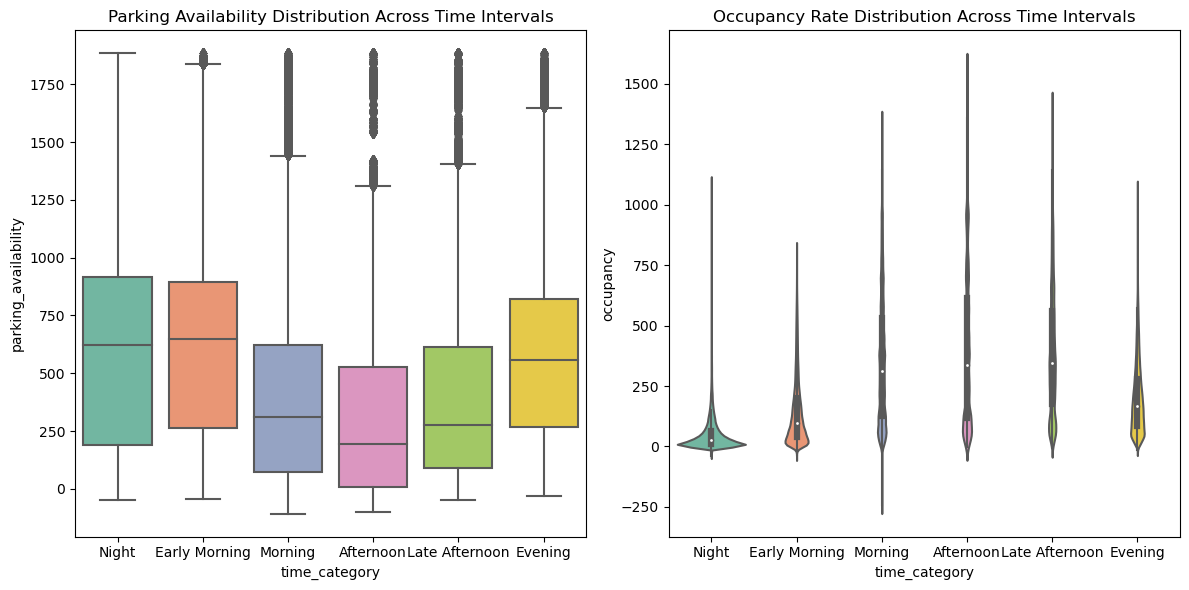

In [12]:
# Create a side-by-side boxplot or violin plot
plt.figure(figsize=(12, 6))

# Side-by-side boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='time_category', y='parking_availability',
            data=final_df, palette='Set2')
plt.title('Parking Availability Distribution Across Time Intervals')

# Side-by-side violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='time_category', y='occupancy',
               data=final_df, palette='Set2')
plt.title('Occupancy Rate Distribution Across Time Intervals')

plt.tight_layout()
plt.show()

1. **Parking Availability Distribution Across Time Intervals**

The green bars represent the number of available parking spots during different times of day.
    
- **Night**: There are ample parking spots available during the night.
- **Early Morning**: Availability remains high.
- **Morning**: Still a good number of spots.
- **Afternoon**: Availability starts to decrease slightly.
- **Late Afternoon**: A dip in availability.
- **Evening**: The lowest availability, but still some spots.


2. **Occupancy Rate Distribution Across Time Intervals**

 The violin plots show the distribution of occupancy rates.
    
- **Night**: Occupancy is relatively low, with a wide spread.
- **Early Morning**: Occupancy remains low.
- **Morning**: A peak around the median occupancy.
- **Afternoon**: Occupancy increases, with a narrower spread.
- **Late Afternoon**: Highest occupancy, concentrated around the median.
- **Evening**: Occupancy decreases slightly.

The analysis reveals insights into parking availability and occupancy rates across various time intervals. Parking availability remains relatively consistent throughout the day, with a slight decline observed in the late afternoon and evening. Conversely, occupancy rates peak during the afternoon and late afternoon periods, indicating increased demand for parking spaces during these times. For optimal parking opportunities, it is recommended to target early morning or late afternoon intervals, where a favorable balance between availability and occupancy is likely to be found.

## __Monthly Average Occupancy for each Facility__

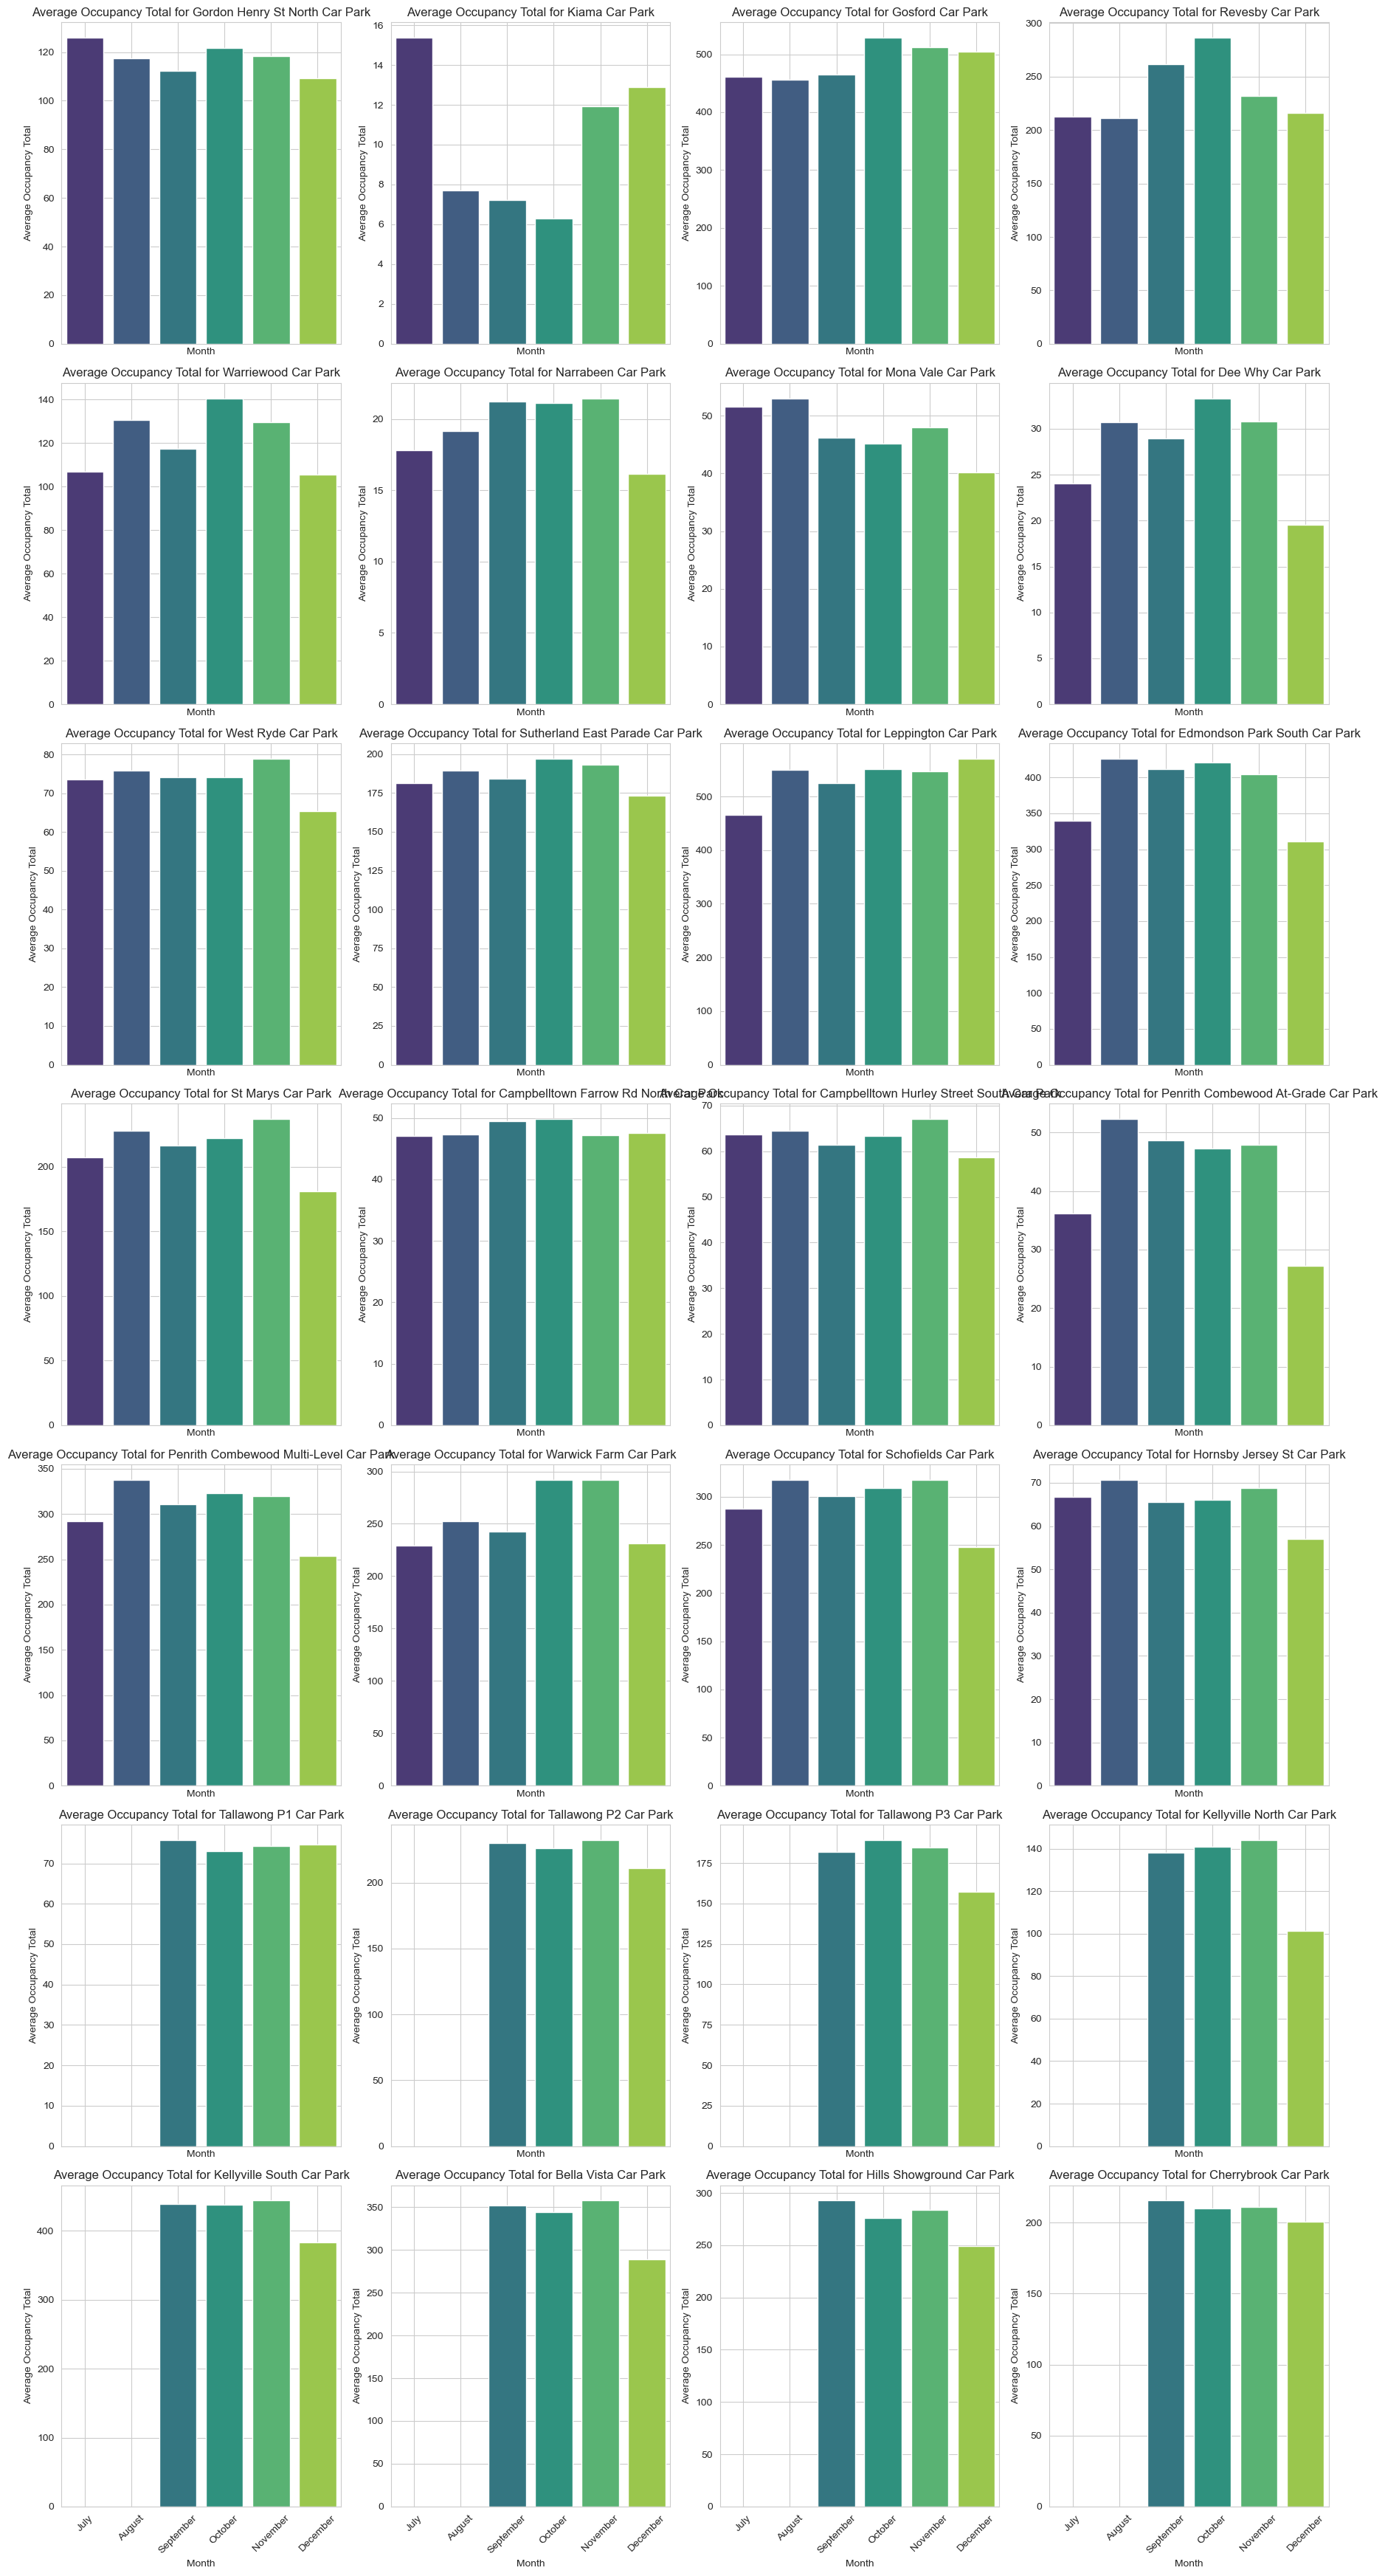

In [13]:
import math

# List of unique facility names
facility_names = final_df['facility_name'].unique()

# Set the style of the plot
sns.set_style("whitegrid")

# Calculate the number of rows and columns for subplots
num_facilities = len(facility_names)
num_cols = 4  # Number of columns per row
num_rows = math.ceil(num_facilities / num_cols)  # Round up to the nearest integer

# Create subplots with calculated rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5), sharex=True)

# Iterate over each facility name and its corresponding axis
for idx, (facility_name, ax) in enumerate(zip(facility_names, axes.flatten())):
    # Filter data for the current facility
    facility_data = final_df[final_df['facility_name'] == facility_name]
    
    # Group the data by month and calculate the average occupancy total
    facility_month_avg = facility_data.groupby('month')['occupancy'].mean().reset_index()
    
    # Create bar plot for the current facility
    sns.barplot(data=facility_month_avg, x='month', y='occupancy', palette='viridis', ax=ax)
    
    # Set title and labels for the current subplot
    ax.set_title(f'Average Occupancy Total for {facility_name}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Occupancy Total')
    ax.set_xticks(range(6))
    ax.set_xticklabels(['July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid(True)

# Hide empty subplots if the number of facilities is not a multiple of num_cols
if num_facilities % num_cols != 0:
    for ax in axes.flatten()[num_facilities:]:
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


The graph illustrates the average occupancy across the months of July through December for a dataset comprising 28 parking facilities. On the x-axis, we have the months, ranging from July to December, while the y-axis represents the average occupancy level. Each data point on the graph corresponds to the average occupancy recorded for a specific month across all 28 parking facilities.

The observed trend indicates that December exhibits the lowest average occupancy compared to the preceding months of July through November. This decline in occupancy during December can be attributed to several factors:

1. **Holiday Season**: December encompasses the holiday season, characterized by public holidays such as Christmas and New Year's Eve. During this period, many individuals may be on vacation or traveling, resulting in reduced demand for parking facilities and consequently lower occupancy rates.

2. **Reduced Workdays**: December often includes public holidays and reduced workdays, leading to fewer commuters and workers requiring parking spaces. This decrease in daily commuting contributes to a decline in overall occupancy levels across parking facilities.

3. **Travel Plans**: Some individuals may travel during December for vacations or family gatherings, further reducing the local demand for parking facilities and contributing to lower average occupancy rates.

Overall, the combination of holiday-related factors, reduced workdays, school holidays, and altered shopping patterns during December likely contributes to the observed decrease in parking facility occupancy compared to the preceding months.

## __Average Occupancy by Day of the Week__

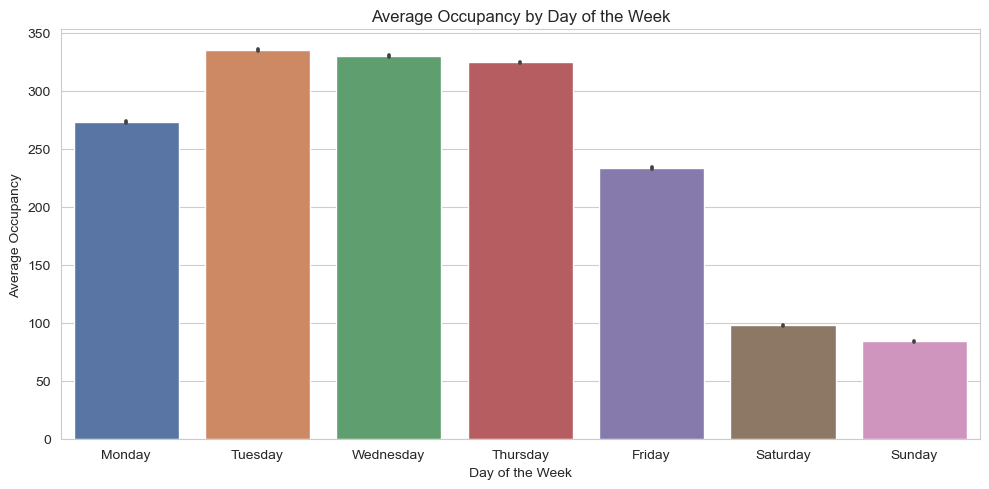

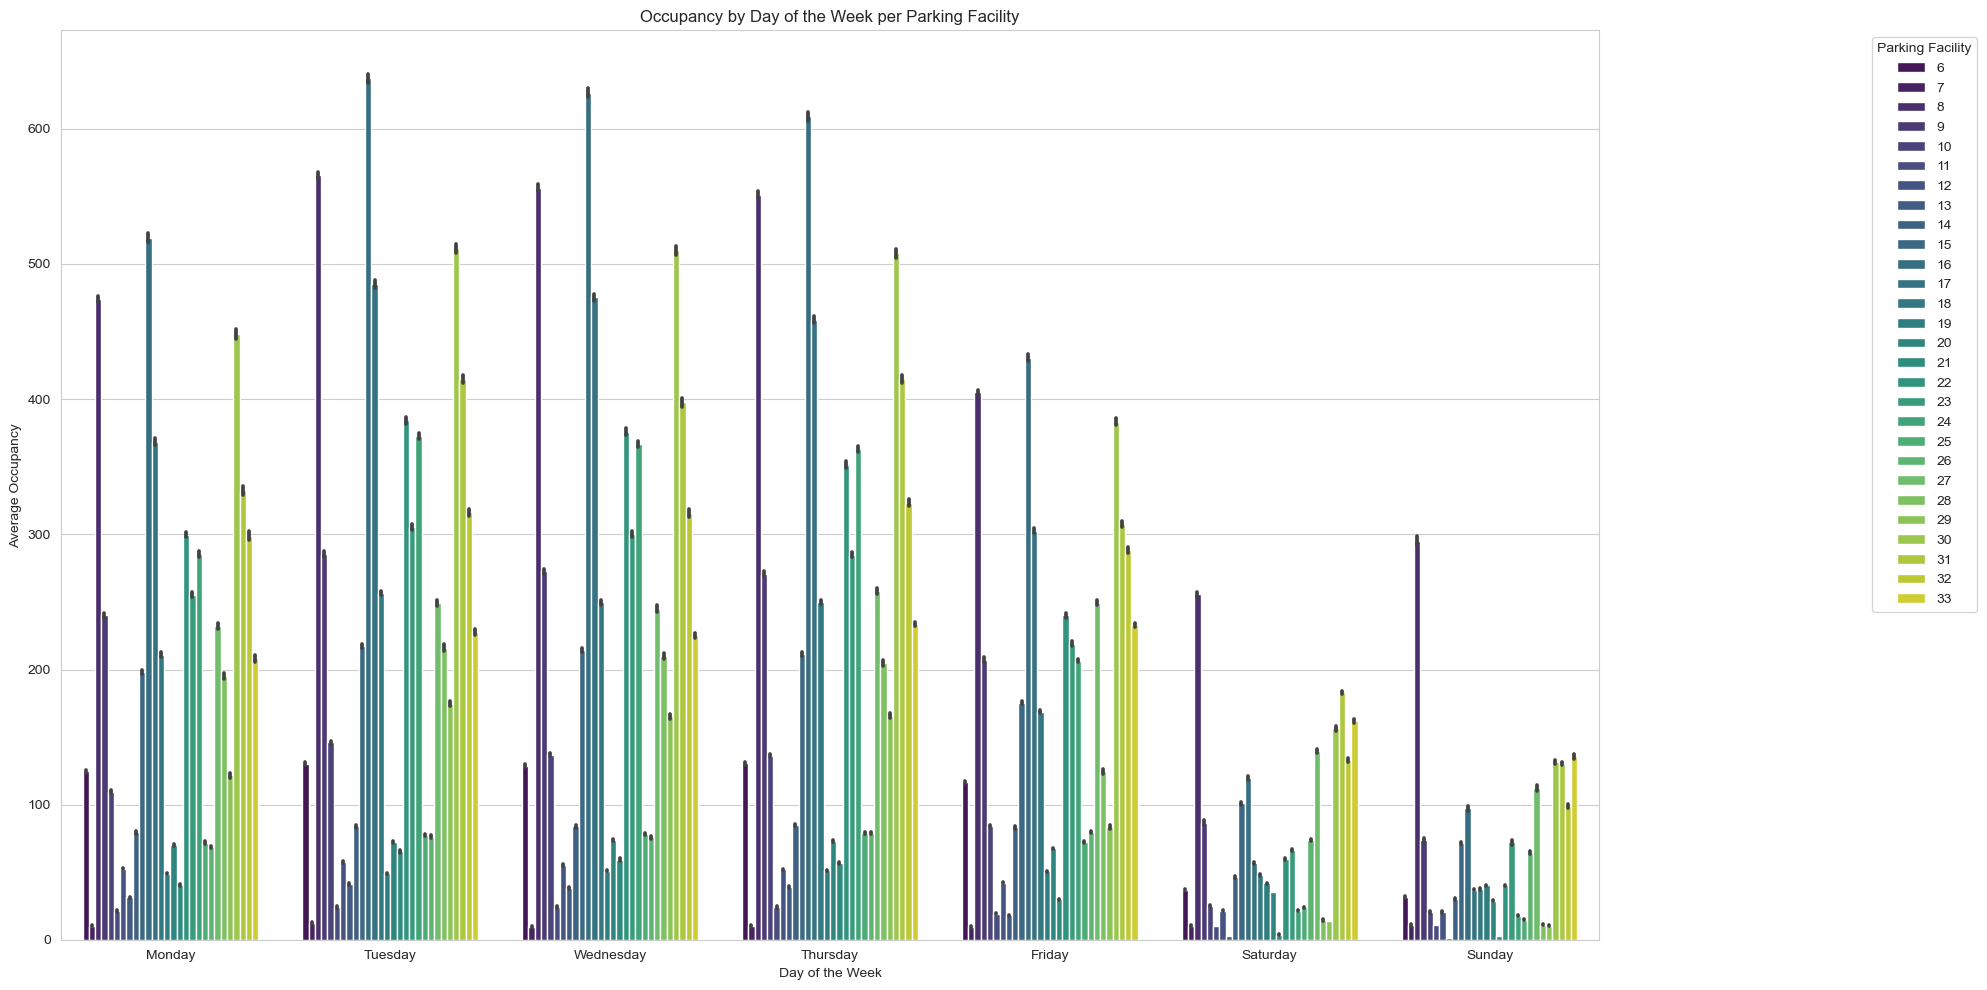

In [15]:
# Order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# First subplot: Average Occupancy by Day of the Week
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.barplot(x='day_of_week', y='occupancy', data=final_df, palette='deep', order=day_order)
plt.title('Average Occupancy by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Occupancy')
plt.tight_layout()

# Show the first plot
plt.show()

# Second subplot: Occupancy by Day of the Week per Parking Facility
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(x='day_of_week', y='occupancy', data=final_df, palette='viridis', hue='facility_id', order=day_order)
plt.title('Occupancy by Day of the Week per Parking Facility')
plt.xlabel('Day of the Week')
plt.ylabel('Average Occupancy')
plt.legend(title='Parking Facility', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()

# Show the second plot
plt.show()


**Average Occupancy by Day of the Week**

- **Axes**:
    - **Y-Axis**: Represents the average occupancy, ranging from **0** to **350**.
    - **X-Axis**: Lists the days of the week from **Monday** to **Sunday**.

The graph depicts the average occupancy levels across different days, ranging from Monday to Sunday. Tuesday stands out with the highest average occupancy, surpassing 325, while Sunday records the lowest average occupancy, barely surpassing 100. The other days fall between these extremes.



**Occupancy by Day of the Week per Parking Facility**

- **Axes**:
    - **Y-Axis**: Represents the **occupancy level**, ranging from **0** to **900**.
    - **X-Axis**: Lists the days of the week from **Monday** to **Sunday**.

- **Bars**:
    - Each colored bar represents a different **parking facility**, numbered from **6** to **33**.
    - The colors of the bars correspond to specific facilities, as indicated in the legend on the right side of the graph.
    - Some facilities show **high occupancy**, while others have **lower occupancy** levels.

The second graph illustrates occupancy levels across various parking facilities. While some facilities consistently exhibit high occupancy levels, others show lower and more variable occupancy rates across different days of the week.

**Recommendations**
- **Peak Days**: Consider allocating additional resources (staff, maintenance) on days with high occupancy.
- **Facility-Specific Strategies**: Tailor management strategies based on the occupancy patterns of individual facilities.

## __Average Occupancy Percentage per Facility__

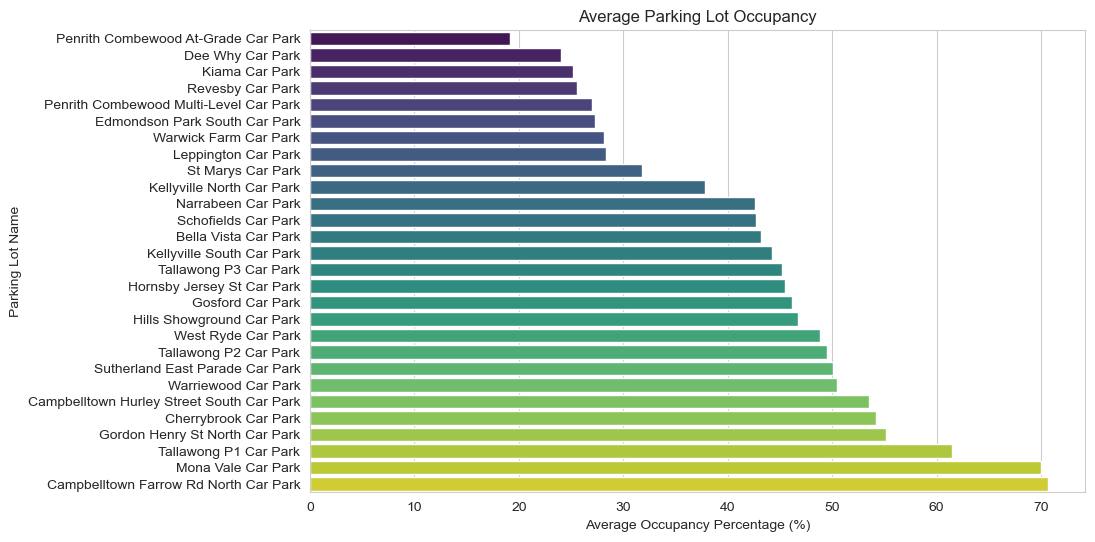

In [16]:
# Calculate the percentage of occupied slots
final_df['OccupancyPercentage'] = (final_df['occupancy'] / final_df['capacity']) * 100

# Group by ParkingLotID and calculate average occupancy percentage
average_occupancy = final_df.groupby('facility_name')['OccupancyPercentage'].mean().reset_index()

# Sort the DataFrame by average occupancy percentage in ascending order
average_occupancy = average_occupancy.sort_values(by='OccupancyPercentage')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y = average_occupancy['facility_name'], x = average_occupancy['OccupancyPercentage'],
            data=final_df, palette='viridis', orient='h')
plt.title('Average Parking Lot Occupancy')
plt.ylabel('Parking Lot Name')
plt.xlabel('Average Occupancy Percentage (%)')
# plt.ylim(0, 100)
plt.show()

The bar graph above represents the average occupancy percentage of various car parks. Here are the details:

**Graph Structure**:
- The x-axis represents the "Average Occupancy Percentage (%)" ranging from 0% to 70%.
- The y-axis lists the names of different car parks. Each bar's length corresponds to the average occupancy percentage of that particular car park.

**Car Park Occupancy**:
- **Perith Combewood At-Grade Car Park** has the lowest occupancy rate, below 10%.
- **Campbelltown Farrow Rd North Car Park** has the highest occupancy rate, close to 70%.

## __Monthly Average Parking Availability for each Facility__

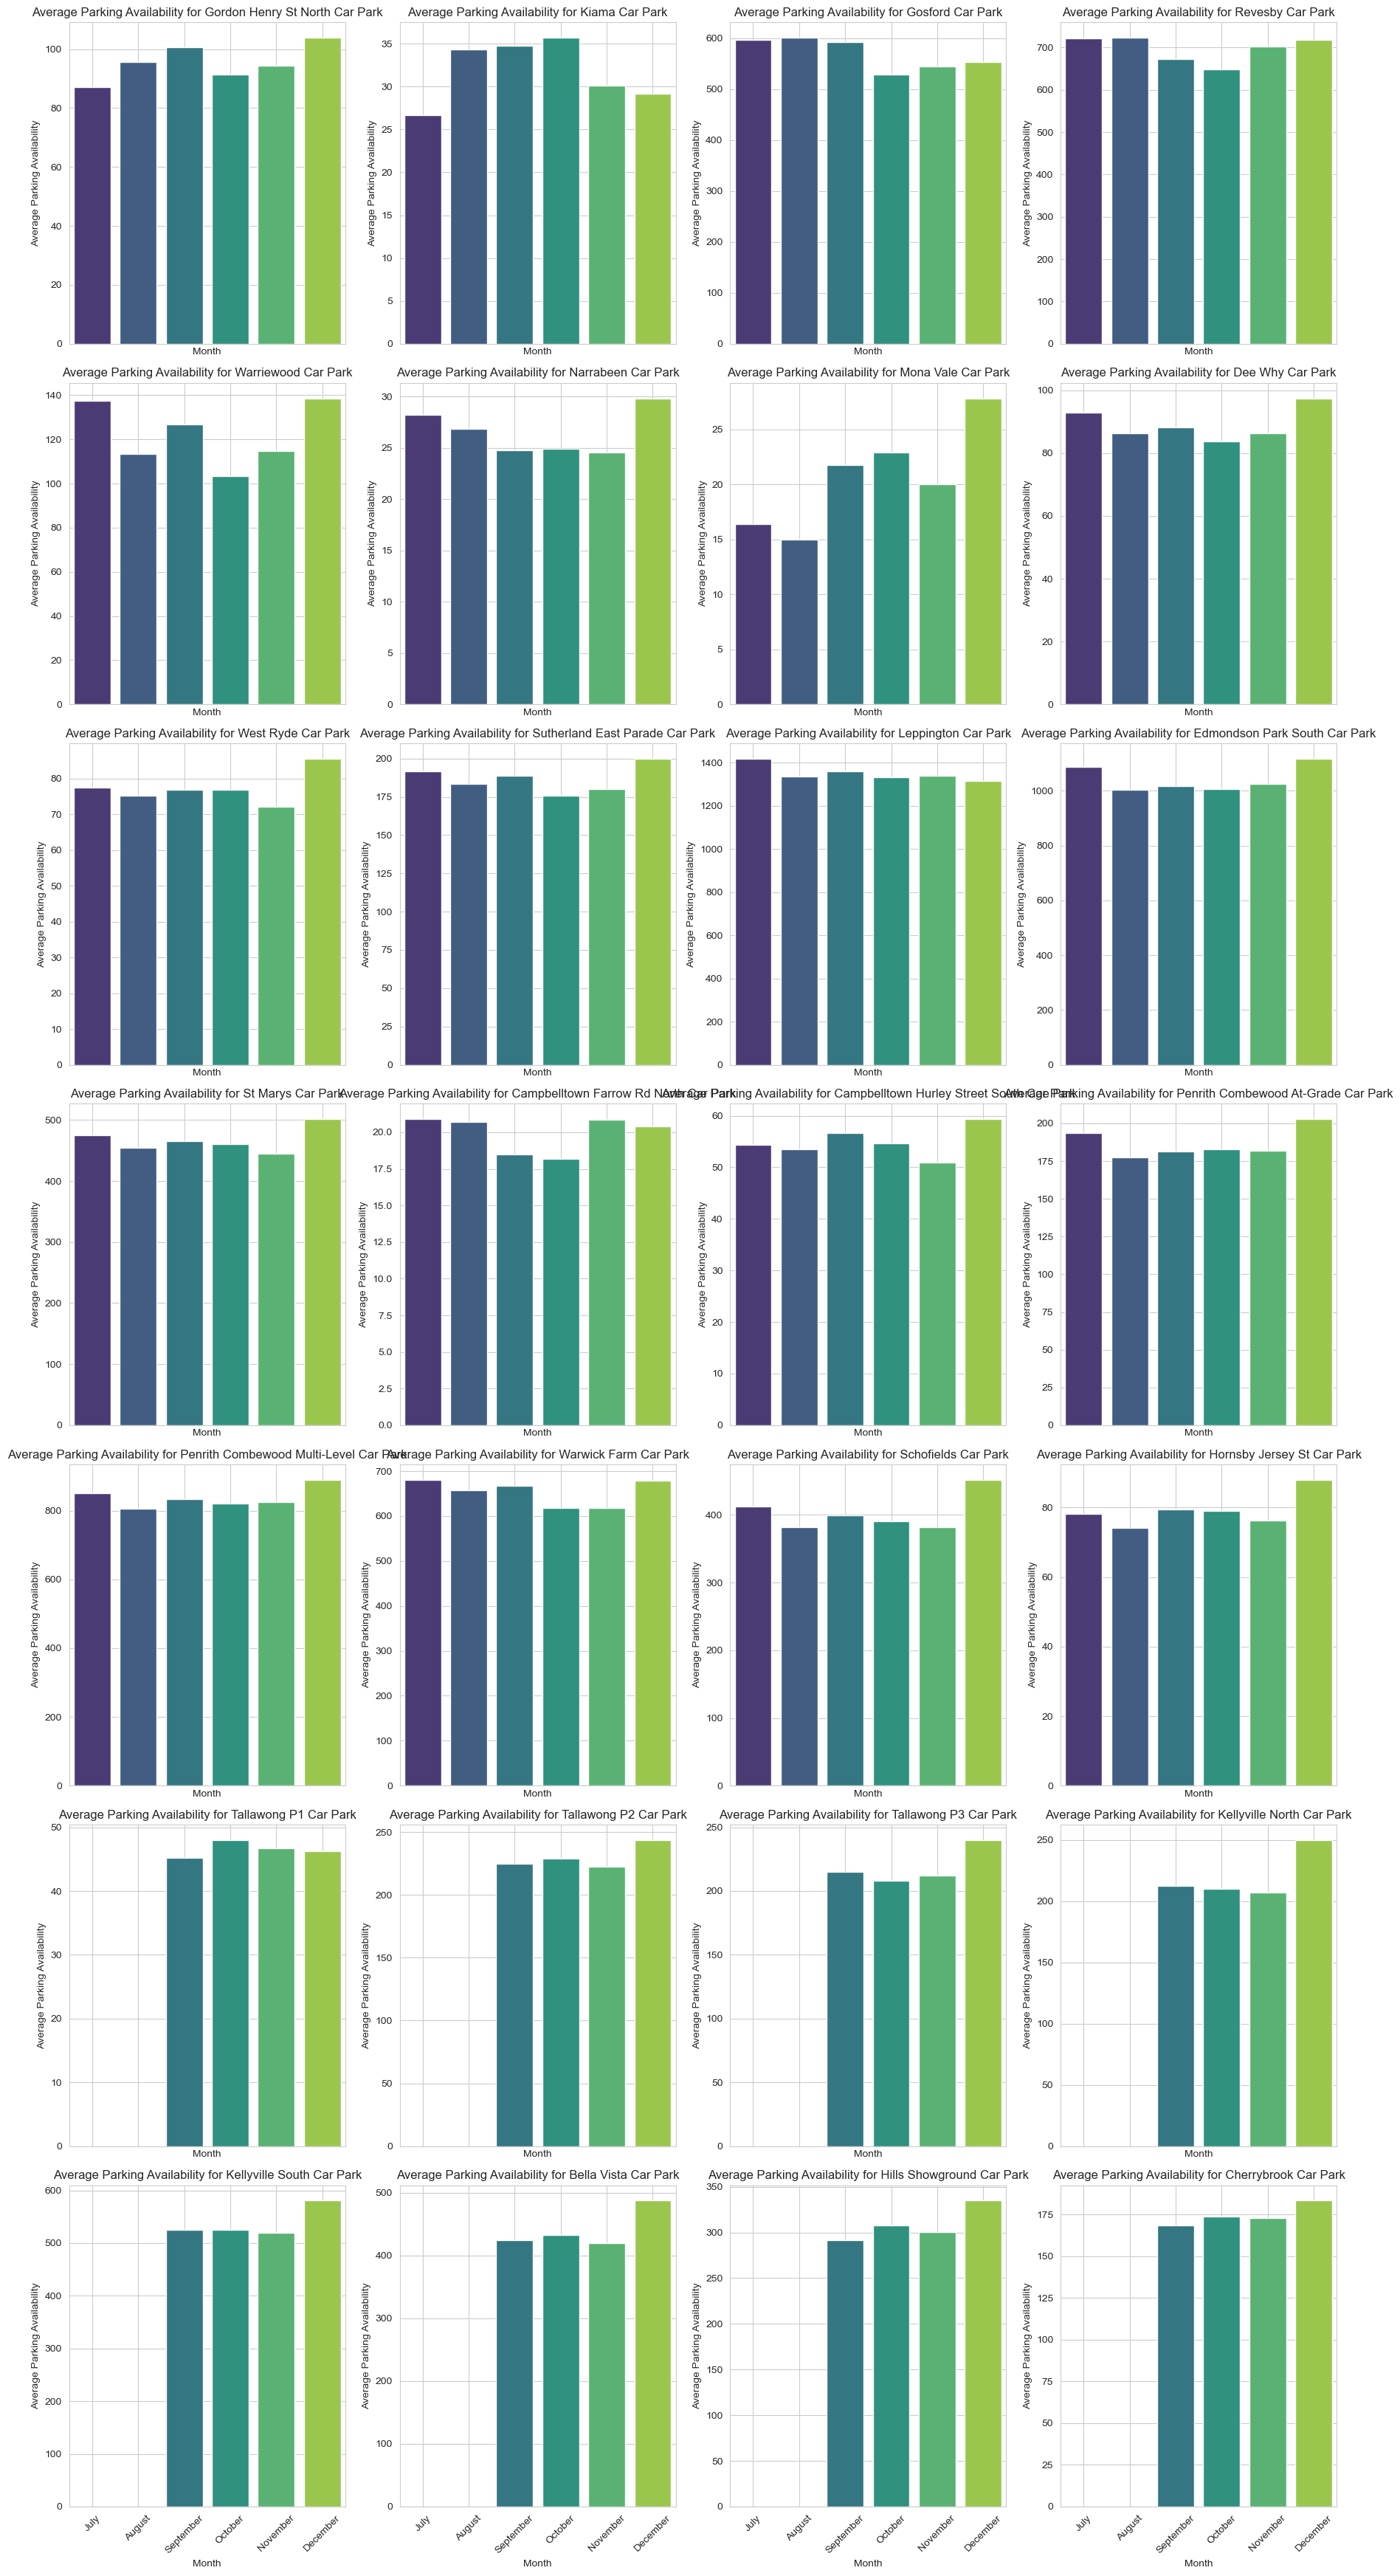

In [25]:
import math

# List of unique facility names
facility_names = final_df['facility_name'].unique()

# Set the style of the plot
sns.set_style("whitegrid")

# Calculate the number of rows and columns for subplots
num_facilities = len(facility_names)
num_cols = 4  # Number of columns per row
num_rows = math.ceil(num_facilities / num_cols)  # Round up to the nearest integer

# Create subplots with calculated rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 5), sharex=True)

# Iterate over each facility name and its corresponding axis
for idx, (facility_name, ax) in enumerate(zip(facility_names, axes.flatten())):
    # Filter data for the current facility
    facility_data = final_df[final_df['facility_name'] == facility_name]
    
    # Group the data by month and calculate the average parking_availability total
    facility_month_avg = facility_data.groupby('month')['parking_availability'].mean().reset_index()
    
    # Create bar plot for the current facility
    sns.barplot(data=facility_month_avg, x='month', y='parking_availability', palette='viridis', ax=ax)
    
    # Set title and labels for the current subplot
    ax.set_title(f'Average Parking Availability for {facility_name}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Parking Availability')
    ax.set_xticks(range(6))
    ax.set_xticklabels(['July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
    ax.tick_params(axis='x', labelrotation=45)
    ax.grid(True)

# Hide empty subplots if the number of facilities is not a multiple of num_cols
if num_facilities % num_cols != 0:
    for ax in axes.flatten()[num_facilities:]:
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


The graph above illustrates the monthly average parking availability for each facility, spanning from July through November. 

**Graph structure**:
- x-axis represents months from Jult through December
- y-axis indicates the average parking availability for the corresponding facility during that month. 

There is a noticeable increase in parking availability during December compared to the preceding months. This trend suggests that December generally exhibits higher parking availability across facilities compared to the earlier months. Possible reasons for this could include reduced demand for parking due to holidays, vacations, or changes in usage patterns during the festive season.

## __Average Parking Availability by Day of the Week__

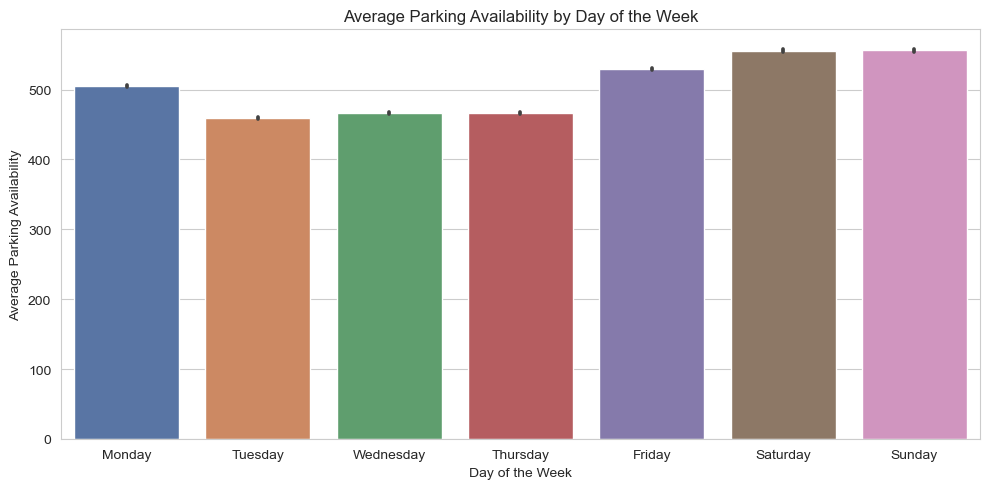

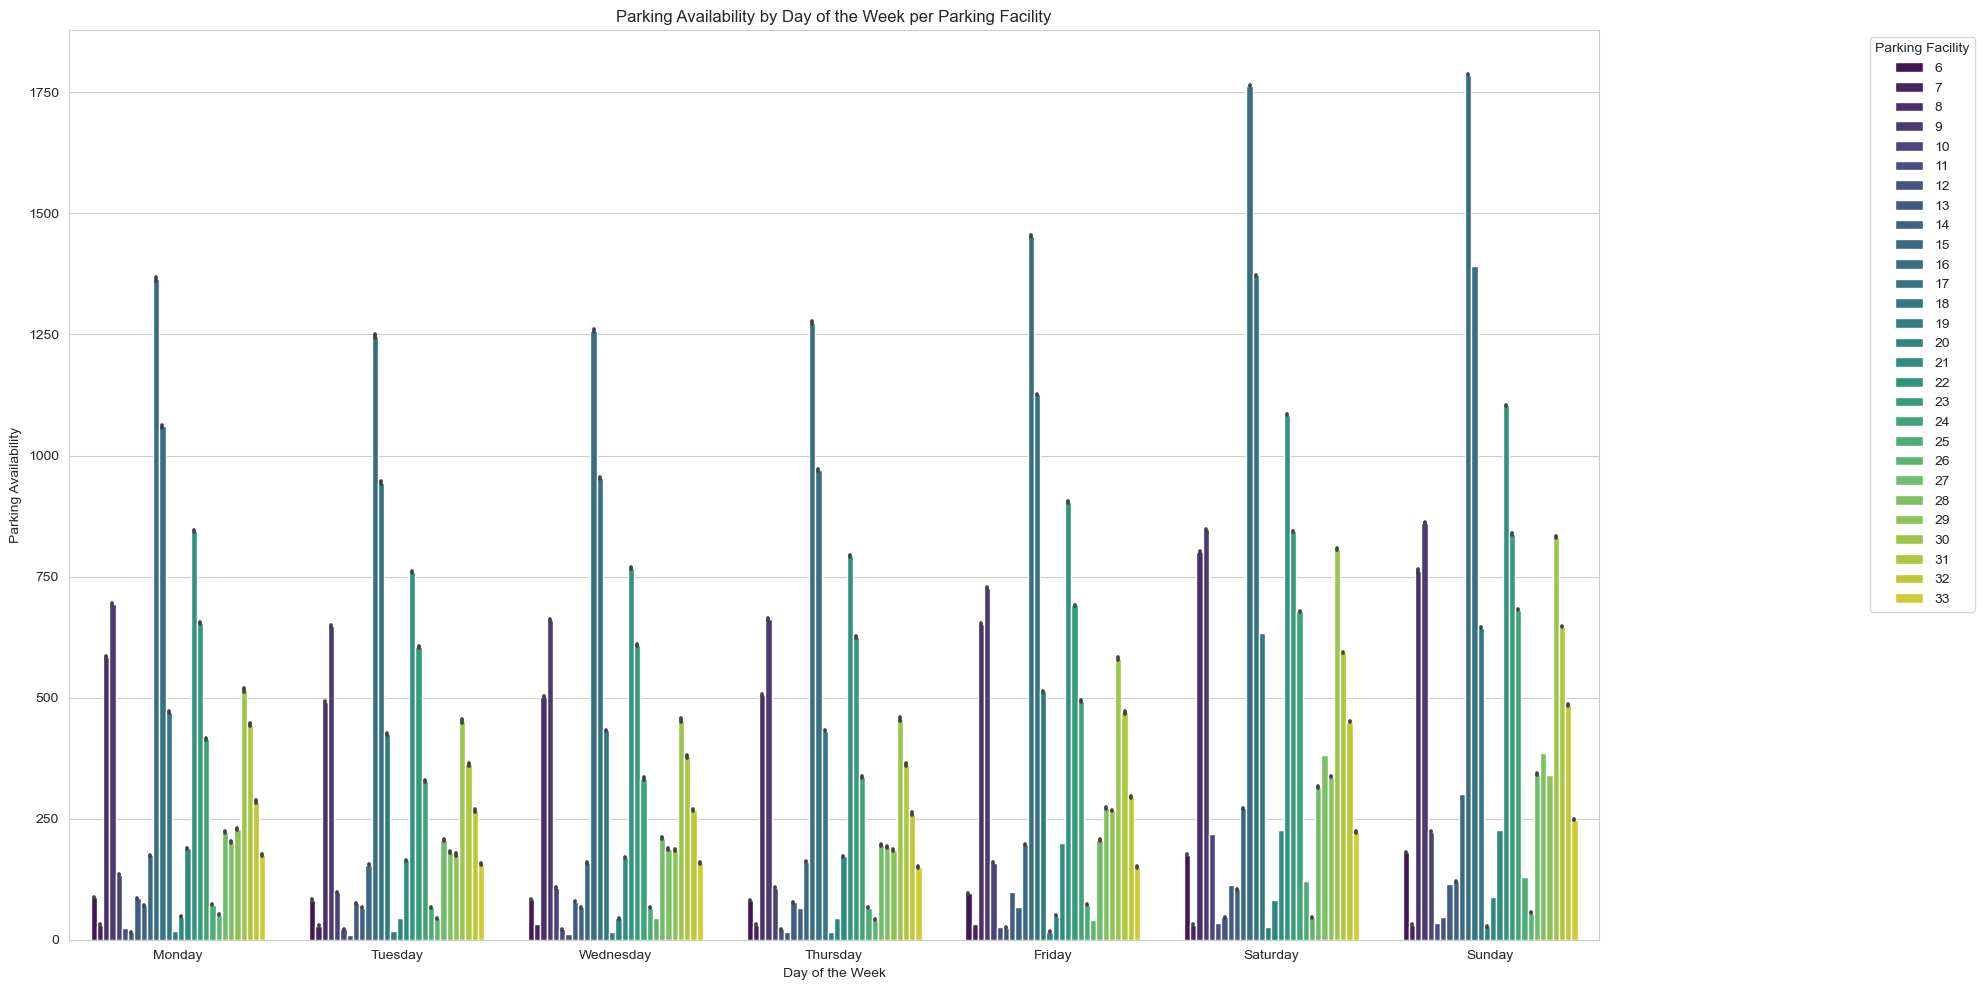

In [17]:
# Order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# First subplot: Average Parking Availability by Day of the Week
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
sns.barplot(x='day_of_week', y='parking_availability', data=final_df, palette='deep', order=day_order)
plt.title('Average Parking Availability by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Parking Availability')
plt.tight_layout()

# Show the first plot
plt.show()

# Second subplot: Parking Availability by Day of the Week per Parking Facility
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.barplot(x='day_of_week', y='parking_availability', data=final_df, palette='viridis', hue='facility_id', order=day_order)
plt.title('Parking Availability by Day of the Week per Parking Facility')
plt.xlabel('Day of the Week')
plt.ylabel('Parking Availability')
plt.legend(title='Parking Facility', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()

# Show the second plot
plt.show()


**Average Parking Availability by Day of the Week**.

**Graph Structure**:
- The x-axis represents the "Day of the Week," featuring days from Monday to Sunday.
- The y-axis is labeled as "**Average Parking Availability**" and ranges from 0 to 500.
Each day of the week has a distinct colored bar that reaches up to approximately 500, indicating high parking availability throughout the week.


**Interpretation**:
The graph provides insights into the average parking availability for each day of the week. All bars are almost equal in height, suggesting similar parking availability across all days.
Despite minor fluctuations, parking availability remains consistent throughout the week.

**Parking Availability by Day of the Week per Parking Facility**

**Graph Structure**:
- The x-axis represents the days of the week, starting from **Monday** and ending with **Sunday**.
- The y-axis shows the number of available parking spots, ranging from **0** to approximately **1600**.
- Each day has multiple bars (in various colors) representing data for different parking facilities shown by the legend on the right side which indicates the color corresponding to each facility.

**Observations**:
   - **Saturday** and **Sunday** exhibit some of the highest peaks, indicating high parking availability during these days. Availability varies significantly both between days and across different facilities.

## __Parking Availability by Parking Facility__

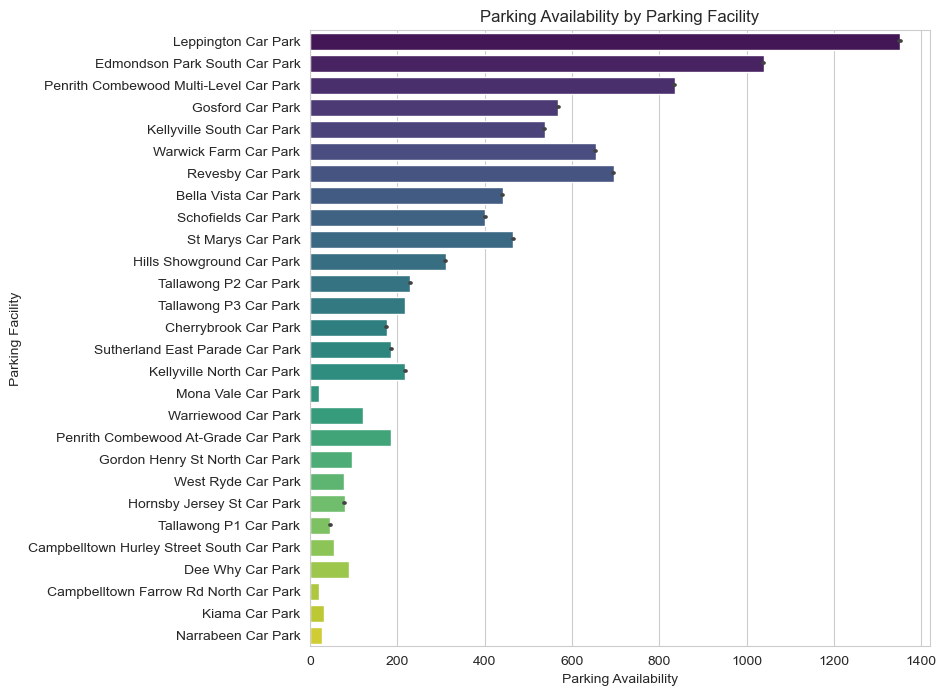

In [18]:
# Sort the DataFrame by parking availability in descending order
final_df_sorted = final_df.sort_values(by='parking_availability', ascending=False)

# Bar plot
plt.figure(figsize=(8, 8))
sns.barplot(y='facility_name', x='parking_availability',
            data=final_df_sorted, palette='viridis', orient='h')
plt.title('Parking Availability by Parking Facility')
plt.xlabel('Parking Availability')
plt.ylabel('Parking Facility')
plt.show()


**Parking Availability by Parking Facility**

The graph above provides information about the parking availability at various car parks. Here are the details:

**Graph Structure**:
- The x-axis represents the "Parking Availability," ranging from 0 to approximately 1400 available spaces.
- The y-axis lists the names of different car parks.
Each bar corresponds to a specific car park and indicates the number of available parking spaces.

**Car Parks and Availability**:
   - **Leppington Car Park** and **Edmondson Park South Car Park** have the longest bars, suggesting they have the most available spaces.
   - Other car parks, such as **Penrith Combeewood Multi-Level**, **Gosford**, **Kellyville South**, **Warwick Farm**, **Revesby**, and **Bella Vista**, also show significant availability.

## __Parking Lot Capacity vs. Occupancy__

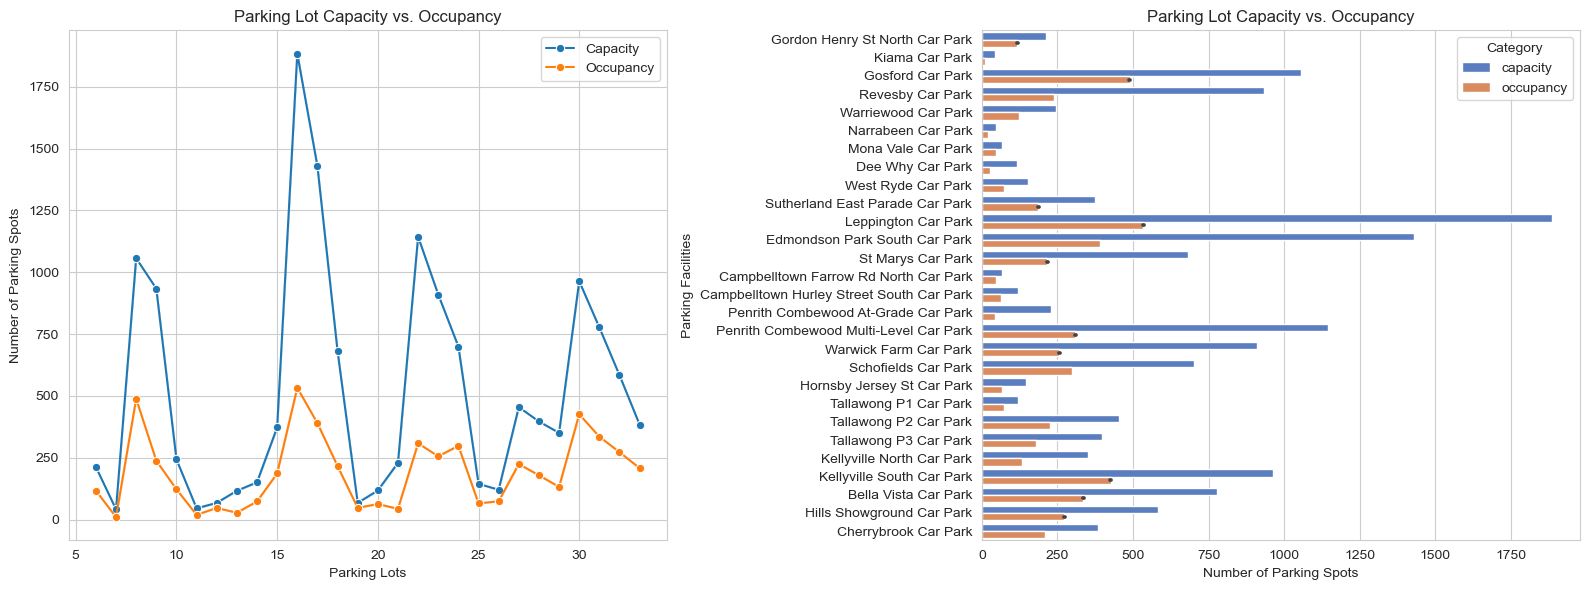

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting the line plot on the first subplot
sns.lineplot(x='facility_id', y='capacity', data=final_df, label='Capacity', marker='o', ax=axes[0])
sns.lineplot(x='facility_id', y='occupancy', data=final_df, label='Occupancy', marker='o', ax=axes[0])

# Adding labels and title to the first subplot
axes[0].set_xlabel('Parking Lots')
axes[0].set_ylabel('Number of Parking Spots')
axes[0].set_title('Parking Lot Capacity vs. Occupancy')
axes[0].legend()

# Melt the DataFrame for Seaborn
df_melted = pd.melt(final_df[['facility_name', 'capacity', 'occupancy']], id_vars='facility_name', var_name='Category', value_name='Value')

# Creating a multiple bar plot on the second subplot
sns.barplot(y='facility_name', x='Value', hue='Category', data=df_melted, palette='muted', orient='h', ax=axes[1])

# Adding labels and title to the second subplot
axes[1].set_ylabel('Parking Facilities')
axes[1].set_xlabel('Number of Parking Spots')
axes[1].set_title('Parking Lot Capacity vs. Occupancy')
axes[1].legend(title='Category')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


**Line Chart**:
- **Blue Line (Capacity)**: Represents the total number of parking spots available (capacity).
- **Orange Line (Occupancy)**: Indicates the actual car occupancy in the parking lots.
Both lines fluctuate over time and generally, the orange line (occupancy) remains below the blue line (capacity), suggesting available spaces in all lots.


**Bar Chart**:
The right graph lists specific car parks along with their capacities and occupancies and each bar represents a parking facility:
- **Blue Bars**: Show the total capacity (number of parking spots).
- **Orange Bars**: Represent the current occupancy levels.
Observations:
- Most car parks have available spaces (difference between blue and orange bars) and some car parks are nearly full.
    

**Recommendations**:
- **Underutilized Lots**:
For car parks with consistently low occupancy, consider:
    - Implementing dynamic pricing to encourage use during off-peak hours.
    - Explore partnerships (with nearby businesses) to increase utilization.

- **Highly Occupied Lots**:
For lots nearing full capacity, consider:
    - Expanding or optimizing management systems to prevent overflow.
    - Offering alternative transportation options (shuttles, public transit) to reduce reliance on personal vehicles.
    - Implementing real-time availability updates to guide drivers to less crowded lots.

## __Parking Availability by Time Category__

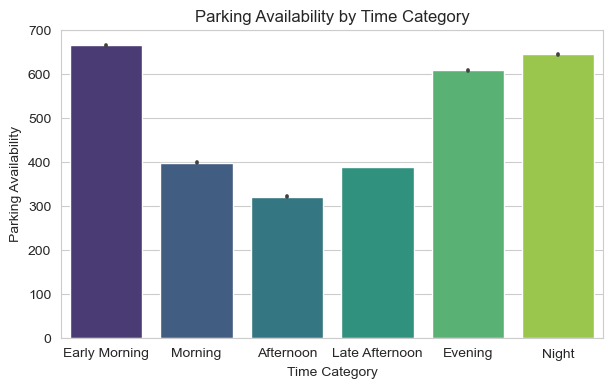

In [20]:
# Bar plot grouped by time category
plt.figure(figsize=(7, 4))

# Order of time category
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Late Afternoon', 'Evening', 'Night']
sns.barplot(x='time_category', y='parking_availability',
            data=final_df, palette='viridis', order = time_order)
plt.title('Parking Availability by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Parking Availability')
plt.show()

**Parking Availability by time category**

**Graph Structure**:
- The x-axis represents different **time categories**
- The y-axis represents the **number of available parking spots** and the vertical bars indicate the parking availability for each time category.

The graph illustrates the distribution of parking availability across different time categories. Early morning and night exhibit the highest availability, with approximately 700 spots each, followed by evening with around 600 spots. Morning and late afternoon maintain relatively stable availability, with about 300 spots each. The observations suggest potential opportunities for optimizing parking management strategies, such as dynamic pricing during peak hours and providing real-time availability updates to drivers.

## __Multivariate Analysis__

### __Effect of Holiday on Parking Availability__

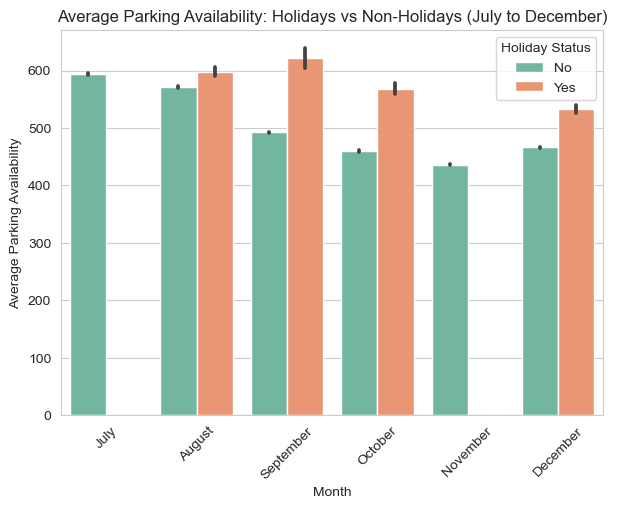

In [21]:
# Create a bar plot with Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='parking_availability', hue='is_holiday', data=final_df, palette='Set2', estimator='mean')

# Adding labels and title
plt.title('Average Parking Availability: Holidays vs Non-Holidays (July to December)')
plt.xlabel('Month')
plt.ylabel('Average Parking Availability')
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Holiday Status')

# Show the plot
plt.show()

**Average Parking Availability: Holidays vs Non-Holidays (July to December)**

**Graph Structure**:
- The title of the graph is "**Average Parking Availability: Holidays vs Non-Holidays (July to December)**."
- The x-axis represents the months from **July** to **December** with two sets of bars for each month:
    - **Orange Bars**: Represent holidays.a
    - **Green Bars**: Represent non-holidays.
- The y-axis represents the **average parking availability**, ranging from 0 to slightly above 600.

**Observations**:
- For most months (July to November), parking availability is higher during **non-holidays**. However, in **December**, parking availability is higher during **holidays**. This observation suggests the need to adjust parking management strategies to accommodate holiday schedules, optimize resources during peak holiday periods, and continually monitor trends to ensure sufficient availability.

### __Correlation Heatmap__

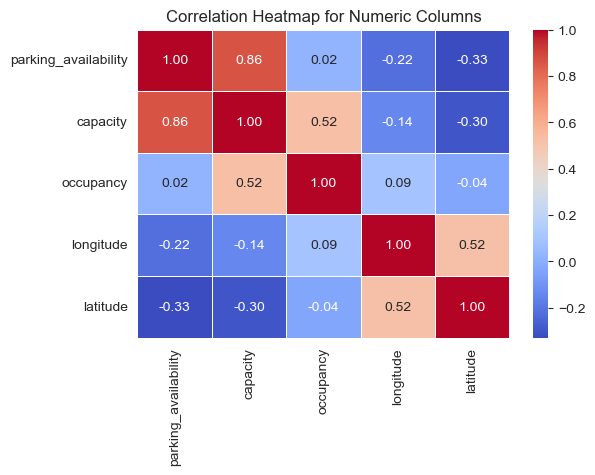

In [22]:
# Filter only numeric columns
numeric_columns = ['parking_availability', 'capacity', 'occupancy',  'longitude', 'latitude']

# Select numeric columns from the DataFrame
numeric_data = final_df[numeric_columns]

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap for Numeric Columns')

# Show the plot
plt.show()


Breakdown:

**Graph Structure**:
- The x-axis and y-axis list the following variables:
    - **parking_availability**
    - **capacity**
    - **occupancy**
    - **longitude**
    - **latitude**

- The heatmap colors indicate the strength of correlation:
    - Red (1): Strong positive correlation
    - Blue (-0.2): Negative correlation

The heatmap illustrates correlations between various factors in the dataset. Strong positive correlations exist between parking availability and capacity, as well as between occupancy and capacity. Additionally, latitude and longitude exhibit a moderate positive correlation. Notably, parking availability shows a negative correlation with latitude. These insights can guide parking management decisions, indicating that areas with larger capacity tend to have higher availability.

In [23]:
# # Create a pivot table for heatmap
# heatmap_data = final_df.pivot_table(
#     values='parking_availability', index='day_of_week', columns='time_category', aggfunc='mean')

# # Define the order of days of the week
# days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# # Define the order of time categories
# time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# # Create a heatmap
# plt.figure(figsize=(10, 7))
# sns.heatmap(heatmap_data.loc[days_order, time_order], annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
# plt.title('Overall Parking Availability Trends')
# plt.xlabel('Time Category')
# plt.ylabel('Day of the Week')
# plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming final_df contains the data with the 'date' column as the index
narrabeen_data = final_df[final_df['facility_name'] == 'Schofields Car Park']

# Set 'date' column as the index
narrabeen_data.set_index('date', inplace=True)

# Resample the data to daily frequency and fill missing values
narrabeen_data = narrabeen_data.resample('D').mean().fillna(method='ffill')

# Perform seasonal decomposition
decomposition = seasonal_decompose(narrabeen_data['occupancy_total'], model='additive', period=7)  # Assuming weekly seasonality

# Plot the decomposition results
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(narrabeen_data['occupancy_total'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'occupancy_total'

Let's delve deeper into the time series decomposition graph and explore each component:

1. **Original Component**:
   - The **original component** represents the **raw data** without any adjustments. In this case, it appears to be a dataset that varies over time.
   - Looking at the graph, we notice several oscillations (ups and downs) along with an overall declining trend. These fluctuations could be due to various factors, such as seasonality, external events, or underlying patterns.

2. **Trend Component**:
   - The **trend component** is obtained by **smoothing out** the original data to reveal the **long-term behavior** or direction.
   - In your graph, the trend shows a **gradual decline** over the observed period (from July 2023 to January 2024). This decline might indicate a consistent downward movement in the underlying phenomenon being measured.

3. **Seasonality Component**:
   - The **seasonality component** captures **recurring patterns** that occur at regular intervals (e.g., daily, monthly, or yearly).
   - From the graph, we can see periodic peaks and valleys. These could correspond to seasonal effects, such as monthly fluctuations, holidays, or other cyclic events.

4. **Residuals Component**:
   - The **residuals component** represents the **unexplained variations** in the data after removing the trend and seasonality.
   - These residuals are essentially the **noise** or irregularities left behind. They could result from random fluctuations, measurement errors, or other factors not accounted for by the trend and seasonality.

**Conclusion**:
- The declining trend suggests that there might be an underlying reason for the overall decrease in the observed phenomenon.
- Seasonality could provide insights into recurring patterns. For example, if this data represents sales, the peaks might coincide with holiday seasons.
- Analyzing the residuals can help identify anomalies or unexpected deviations from the expected behavior.

## __Time Series Attempt__

In [ ]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# # Load the time series data
# # Assuming 'date' is the datetime index and 'value' is the time series values
# # Replace 'your_data.csv' with the path to your dataset
# data = pd.read_csv('your_data.csv', parse_dates=['date'], index_col='date')

# # Train-test split
# train_data = data.loc['start_date':'split_date']
# test_data = data.loc['split_date':]

# # Fit ARIMA model
# model = ARIMA(train_data, order=(p, d, q))  # Specify the order (p, d, q) of the ARIMA model
# arima_model = model.fit()

# # Forecast
# forecast = arima_model.forecast(steps=len(test_data))

# # Evaluate forecast
# mse = mean_squared_error(test_data, forecast)
# rmse = mse ** 0.5
# print(f"Root Mean Squared Error (RMSE): {rmse}")

# # Visualize forecast
# # Plot the actual values
# plt.plot(data.index, data['value'], label='Actual')
# # Plot the forecasted values
# plt.plot(test_data.index, forecast, label='Forecast', color='red')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('ARIMA Forecast')
# plt.legend()
# plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose

# # Assuming final_df contains the data with the 'date' column as the index
# narrabeen_data = final_df[final_df['facility_name'] == 'Narrabeen Car Park']

# # Set 'date' column as the index
# narrabeen_data.set_index('date', inplace=True)

# # Resample the data to daily frequency and fill missing values
# narrabeen_data = narrabeen_data.resample('D').mean().fillna(method='ffill')

# # Perform seasonal decomposition
# decomposition = seasonal_decompose(narrabeen_data['occupancy_total'], model='additive', period=7)  # Assuming weekly seasonality

# # Plot the decomposition results
# plt.figure(figsize=(12, 8))

# plt.subplot(411)
# plt.plot(narrabeen_data['occupancy_total'], label='Original')
# plt.legend()

# plt.subplot(412)
# plt.plot(decomposition.trend, label='Trend')
# plt.legend()

# plt.subplot(413)
# plt.plot(decomposition.seasonal, label='Seasonality')
# plt.legend()

# plt.subplot(414)
# plt.plot(decomposition.resid, label='Residuals')
# plt.legend()

# plt.tight_layout()
# plt.show()


Let's delve deeper into the time series decomposition graph and explore each component:

1. **Original Component**:
   - The **original component** represents the **raw data** without any adjustments. In this case, it appears to be a dataset that varies over time.
   - Looking at the graph, we notice several oscillations (ups and downs) along with an overall declining trend. These fluctuations could be due to various factors, such as seasonality, external events, or underlying patterns.

2. **Trend Component**:
   - The **trend component** is obtained by **smoothing out** the original data to reveal the **long-term behavior** or direction.
   - In your graph, the trend shows a **gradual decline** over the observed period (from July 2023 to January 2024). This decline might indicate a consistent downward movement in the underlying phenomenon being measured.

3. **Seasonality Component**:
   - The **seasonality component** captures **recurring patterns** that occur at regular intervals (e.g., daily, monthly, or yearly).
   - From the graph, we can see periodic peaks and valleys. These could correspond to seasonal effects, such as monthly fluctuations, holidays, or other cyclic events.

4. **Residuals Component**:
   - The **residuals component** represents the **unexplained variations** in the data after removing the trend and seasonality.
   - These residuals are essentially the **noise** or irregularities left behind. They could result from random fluctuations, measurement errors, or other factors not accounted for by the trend and seasonality.

**Interpretation**:
- The declining trend suggests that there might be an underlying reason for the overall decrease in the observed phenomenon.
- Seasonality could provide insights into recurring patterns. For example, if this data represents sales, the peaks might coincide with holiday seasons.
- Analyzing the residuals can help identify anomalies or unexpected deviations from the expected behavior.

## __Next Steps__
1. To implement a real-time data acquisition pipeline to continuously update the model with the latest parking occupancy data.

2. To conduct pilot tests and gather feedback from end-users to assess the usability and effectiveness of the parking prediction system in real-world scenarios.

3. To deploy the finalized parking spot predictor in urban areas, collaborating with city authorities and parking management companies to integrate it into existing infrastructure and promote widespread adoption.